In [1]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Set TensorFlow logging level to "ERROR"

In [2]:
import pandas as pd

df = pd.read_excel('Data.xlsx', sheet_name=1, header=None, skiprows=1)

df_transposed = df.T

df_transposed.columns = df_transposed.iloc[1]
df_final = df_transposed.drop([0, 1]).reset_index(drop=True)

df_use = pd.get_dummies(df_final, columns=['Digester', 'Source', 'Type', 'Waste', 'Biomass'])

df_use.to_csv('df.csv', index=False)



In [1]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# file_path = 'Data.xlsx'
# data = pd.read_excel(file_path, sheet_name=1 ,header=None)

# column_labels = data.iloc[0, 1:].values

# feature_vector = data.iloc[1:1087, 1:].transpose()
# feature_vector.columns = [f'Feature_{i+1}' for i in range(feature_vector.shape[1])]

# additional_features = data.iloc[1086:, 0].values
# additional_values = data.iloc[1086:, 1:].transpose()
# additional_values.columns = additional_features

# combined_df = pd.concat([feature_vector, additional_values], axis=1)
# combined_df.columns = [str(col) for col in combined_df.columns]

# # combined_df.head()

In [1]:
import pandas as pd

df = pd.read_excel('Data/Data.xlsx', sheet_name=1, header=None, skiprows=1)

feature_vector = df.iloc[0:1086, :]

additional_features = df.iloc[1087:1099, :]

feature_vector.reset_index(drop=True, inplace=True)
additional_features.reset_index(drop=True, inplace=True)


feature_vector_T = feature_vector.transpose()
additional_features_T = additional_features.transpose()

full_data = pd.concat([feature_vector_T, additional_features_T], axis=1)

full_data.reset_index(drop=True, inplace=True)


df = full_data
df = df.drop(0, axis=0)
df
df.to_csv('output.csv', index=False)

import pandas as pd

df = pd.read_excel('Data/Data.xlsx', sheet_name=1, header=None, skiprows=1)

feature_vector = df.iloc[0:1086, :]

additional_features = df.iloc[1087:1099, :]

feature_vector.reset_index(drop=True, inplace=True)
additional_features.reset_index(drop=True, inplace=True)


feature_vector_T = feature_vector.transpose()
additional_features_T = additional_features.transpose()

full_data = pd.concat([feature_vector_T, additional_features_T], axis=1)

full_data.reset_index(drop=True, inplace=True)


df = full_data
df = df.drop(0, axis=0)
df
df.to_csv('output.csv', index=False)


new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

# Reset index for the final DataFrame
df.reset_index(drop=True, inplace=True)

df.head()

pd.set_option('display.max_columns', None)  

df = df[~df.isin(['x']).any(axis=1)]

one_hot_encoded_data = pd.get_dummies(df, columns = ['Digester', 'Source', 'Type', 'Waste', 'Biomass']).astype(int)
# print(one_hot_encoded_data)
df_use = one_hot_encoded_data


In [12]:
df_use.head()

d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Faecalibacterium  \
0                                                  0                                                   
1                                                  0                                                   
2                                                  0                                                   
3                                                  0                                                   
4                                                  0                                                   

   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides  \
0                                                  0                                              
1                                                  0                                              
2                                                  0                                              
3                                                  0                                              
4                                                  0                                              

   d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Roseburia  \
0                                                  0                                           
1                                                  0                                           
2                                           29557077                                           
3                                                  0                                           
4                                                  0                                           

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia-Shigella  \
0                                                  0                                                                        
1                                                  0                                                                        
2                                                  0                                                                        
3                                                  0                                                                        
4                                                  0                                                                        

   d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Veillonellaceae;g__Veillonella  \
0                                                  0                                                                
1                                                  0                                                                
2                                                  0                                                                
3                                                  0                                                                
4                                                  0                                                                

   d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium  \
0                                                  0                                                                 
1                                                  0                                                                 
2                                                  0                                                                 
3                                                  0                                                                 
4                                                  0                                                                 

   d__Bacteria;p__Bacteroidota;c__Bacteroid

## Linear Regression

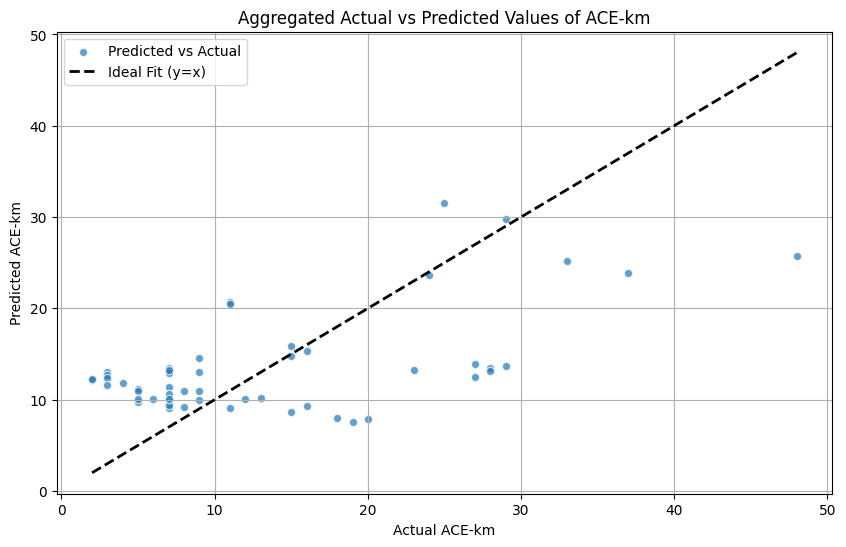


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 67.3014
R-squared: 0.3512


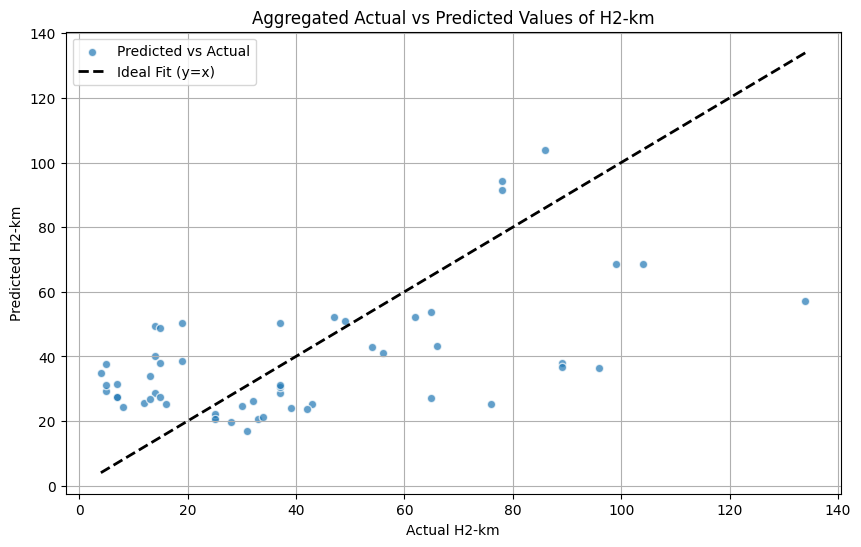


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 665.5525
R-squared: 0.3049


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler  # Use MinMaxScaler for normalization

# Target columns
target_columns = ['ACE-km', 'H2-km']

# Clean the data (adjust as necessary for your dataset)
# df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]
df_cleaned = df_use

# Identify digester columns
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

# Define groups for Leave-One-Group-Out cross-validation
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Remove only target columns from features
feature_columns = df_cleaned.columns.difference(target_columns)

# Identify non-target, non-digester columns for normalization
non_target_non_digester_columns = feature_columns.difference(digester_columns)

# Apply feature scaling (normalization) only to non-target, non-digester columns
scaler = MinMaxScaler()
df_cleaned[non_target_non_digester_columns] = scaler.fit_transform(df_cleaned[non_target_non_digester_columns])

# Convert the data to float if necessary
df_cleaned = df_cleaned.astype(np.float32)

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# Iterate over each target column
for target_column in target_columns:
    # Prepare features and target
    X = df_cleaned[feature_columns].values  # Features (includes digester columns)
    y = df_cleaned[target_column].values    # Target variable (not scaled)

    y_tests = []
    y_preds = []

    # Perform Leave-One-Group-Out cross-validation
    for train_index, test_index in logo.split(X, y, groups):
        # Split the data into training and testing sets based on digester groups
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Initialize the Linear Regression model
        lr_model = LinearRegression()

        # Train the Linear Regression model
        lr_model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = lr_model.predict(X_test)

        # Collect the test targets and predictions
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Calculate overall metrics
    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit (y=x)')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print overall results
    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


### Tree-Based Models

In [ ]:
# For features with value equal to < 1, remove those features.

from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Initialize a dictionary to store feature importances
feature_importances = {}

for target_column in target_columns:
    # Prepare features and target
    X = df_cleaned.drop(columns=target_columns)
    y = df_cleaned[target_column]
    
    # Train a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)
    
    # Store feature importances
    importances = rf_model.feature_importances_
    feature_importances[target_column] = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Display the top 10 important features for each target
for target, importance in feature_importances.items():
    print(f"\nTop 10 important features for {target} based on Random Forest:")
    print(importance.head(1000))



Top 10 important features for ACE-km based on Random Forest:
d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales;f__Arcobacteraceae;g__uncultured                                             0.343355
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Intestinimonas                                                     0.149299
d__Bacteria;p__Dependentiae;c__Babeliae;o__Babeliales;f__Babeliales;g__Babeliales                                                                    0.088544
d__Bacteria;p__Patescibacteria;c__Gracilibacteria;o__Candidatus_Peregrinibacteria;f__Candidatus_Peregrinibacteria;g__Candidatus_Peregrinibacteria    0.080441
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__uncultured                                                          0.048243
                                                                                                                                                    

### Recursive Feature Selection

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize a dictionary to store selected features for each target
selected_features_rfe = {}

for target_column in target_columns:
    # Prepare features and target
    X = df_cleaned.drop(columns=target_columns)
    y = df_cleaned[target_column]
    
    # Initialize the Linear Regression model
    lr_model = LinearRegression()
    
    # Use RFE to select features
    rfe = RFE(estimator=lr_model, n_features_to_select=10)  # Adjust n_features_to_select as needed
    rfe.fit(X, y)
    
    # Store selected features
    selected_features_rfe[target_column] = X.columns[rfe.support_].tolist()

# Display selected features for each target variable
for target, features in selected_features_rfe.items():
    print(f"\nSelected features for {target} based on RFE:")
    print(features)



Selected features for ACE-km based on RFE:
['d__Bacteria;p__Chloroflexi;c__Dehalococcoidia;o__GIF9;f__AB-539-J10;g__AB-539-J10', 'd__Bacteria;p__Firmicutes;c__Limnochordia;o__MBA03;f__MBA03;g__MBA03', 'd__Archaea;p__Micrarchaeota;c__Micrarchaeia;o__Micrarchaeales;f__CG1-02-32-21;g__CG1-02-32-21', 'd__Bacteria;p__Chloroflexi;c__Anaerolineae;o__Anaerolineales;f__Anaerolineaceae;g__Anaerolineaceae_UCG-001', 'd__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Atopobiaceae;g__Atopobium', 'd__Bacteria;p__Thermotogota;c__Thermotogae;o__Petrotogales;f__Petrotogaceae;g__Defluviitoga', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Colidextribacter', 'Digester_CB', 'Digester_NS', 'Waste_FW']

Selected features for H2-km based on RFE:
['d__Bacteria;p__Chloroflexi;c__Anaerolineae;o__Anaerolineales;f__Anaerolineaceae;g__Longilinea', 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Xanthobacteraceae;__', 'd__Archaea;p_

### Principal Component Analysis

In [19]:
from sklearn.decomposition import PCA

# Prepare features
X = df_cleaned.drop(columns=target_columns)

# Apply PCA and select the top components
pca = PCA(n_components=10)  # Adjust n_components as needed
X_pca = pca.fit_transform(X)

# Now use X_pca as the feature set for modeling



Selected features for ACE-km based on RFE:
['d__Bacteria;p__Planctomycetota;c__Phycisphaerae;o__DG-20;f__DG-20;g__DG-20', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Intestinimonas', 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Coxiellales;f__Coxiellaceae;g__Coxiella', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Christensenellales;f__Christensenellaceae;g__uncultured', 'd__Bacteria;p__Planctomycetota;c__Pla4_lineage;o__Pla4_lineage;f__Pla4_lineage;g__Pla4_lineage', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__NK4A214_group', 'd__Bacteria;p__Synergistota;c__Synergistia;o__Synergistales;f__Synergistaceae;g__JGI-0000079-D21', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus', 'd__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;__;__', 'd__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae;g__ADurb.Bin118', 'd__

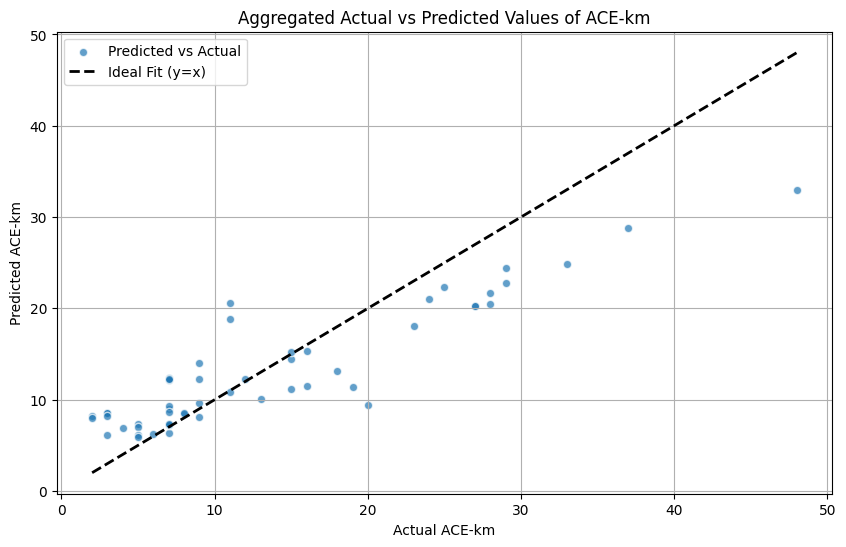


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 25.8173
R-squared: 0.7511


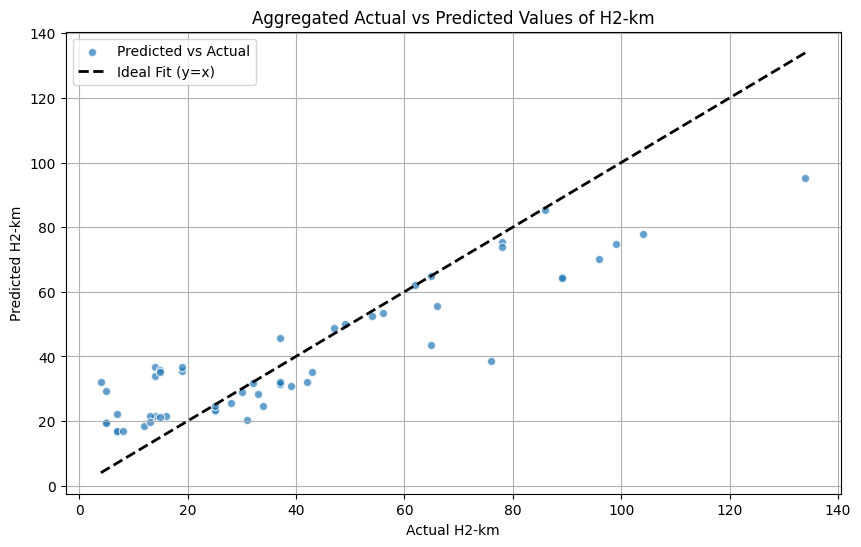


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 225.7096
R-squared: 0.7643


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

# Target columns
target_columns = ['ACE-km', 'H2-km']

# Clean the data (adjust as necessary for your dataset)
df_cleaned = df_use

# Identify digester columns
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

# Define groups for Leave-One-Group-Out cross-validation
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Remove only target columns from features
feature_columns = df_cleaned.columns.difference(target_columns)

# Identify non-target, non-digester columns for normalization
non_target_non_digester_columns = feature_columns.difference(digester_columns)

# Apply feature scaling (normalization) only to non-target, non-digester columns
scaler = MinMaxScaler()
df_cleaned[non_target_non_digester_columns] = scaler.fit_transform(df_cleaned[non_target_non_digester_columns])

# Convert the data to float if necessary
df_cleaned = df_cleaned.astype(np.float32)

# Initialize a dictionary to store selected features for each target
selected_features_rfe = {}

# Perform Recursive Feature Elimination (RFE) to select features for each target
for target_column in target_columns:
    # Prepare features and target
    X = df_cleaned.drop(columns=target_columns)
    y = df_cleaned[target_column]
    
    # Initialize the Linear Regression model
    lr_model = LinearRegression()
    
    # Use RFE to select features
    rfe = RFE(estimator=lr_model, n_features_to_select=100)  # Adjust n_features_to_select as needed
    rfe.fit(X, y)
    
    # Store selected features
    selected_features_rfe[target_column] = X.columns[rfe.support_].tolist()

# Display selected features for each target variable
for target, features in selected_features_rfe.items():
    print(f"\nSelected features for {target} based on RFE:")
    print(features)

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# Iterate over each target column
for target_column in target_columns:
    # Use only the selected features for this target
    selected_features = selected_features_rfe.get(target_column, [])
    if not selected_features:
        print(f"No selected features found for target {target_column}. Skipping...")
        continue
    
    # Prepare features and target using the selected features and digester columns
    X = df_cleaned[selected_features + digester_columns].values  # Selected features + digester columns
    y = df_cleaned[target_column].values  # Target variable (not scaled)

    y_tests = []
    y_preds = []

    # Perform Leave-One-Group-Out cross-validation
    for train_index, test_index in logo.split(X, y, groups):
        # Split the data into training and testing sets based on digester groups
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Initialize the Linear Regression model
        lr_model = LinearRegression()

        # Train the Linear Regression model
        lr_model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = lr_model.predict(X_test)

        # Collect the test targets and predictions
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Calculate overall metrics
    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit (y=x)')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print overall results
    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")



Selected features for ACE-km based on RFE:
['d__Bacteria;p__Planctomycetota;c__Phycisphaerae;o__DG-20;f__DG-20;g__DG-20', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Intestinimonas', 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Coxiellales;f__Coxiellaceae;g__Coxiella', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Christensenellales;f__Christensenellaceae;g__uncultured', 'd__Bacteria;p__Planctomycetota;c__Pla4_lineage;o__Pla4_lineage;f__Pla4_lineage;g__Pla4_lineage', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__NK4A214_group', 'd__Bacteria;p__Synergistota;c__Synergistia;o__Synergistales;f__Synergistaceae;g__JGI-0000079-D21', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus', 'd__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;__;__', 'd__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae;g__ADurb.Bin118', 'd__

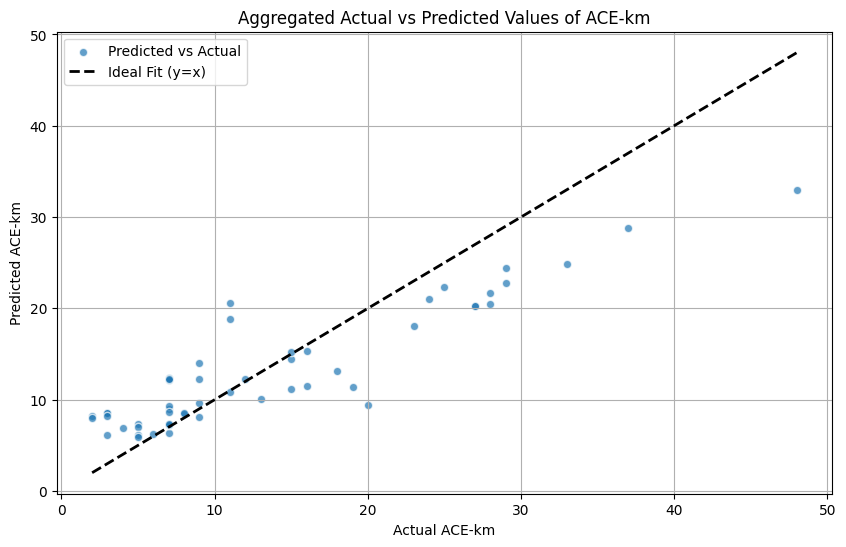


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 25.8173
R-squared: 0.7511


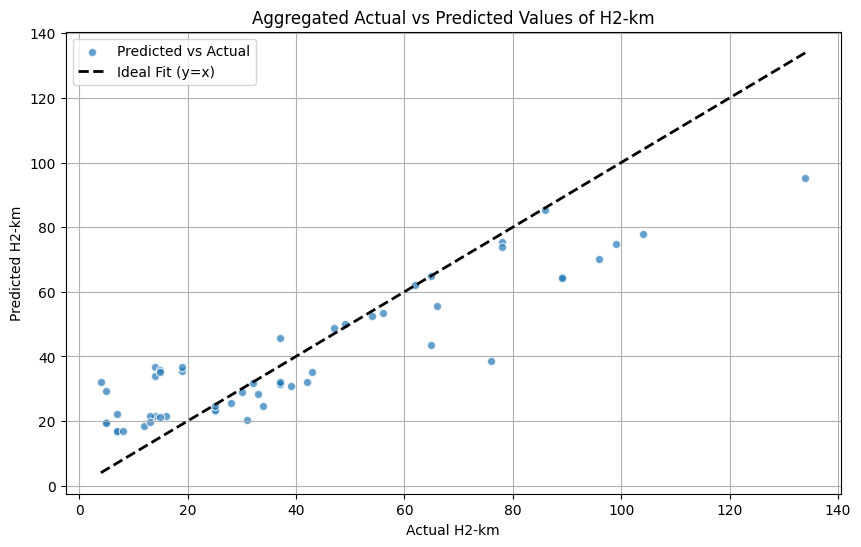


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 225.7096
R-squared: 0.7643


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

# Target columns
target_columns = ['ACE-km', 'H2-km']

# Clean the data (adjust as necessary for your dataset)
df_cleaned = df_use

# Identify digester columns
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

# Define groups for Leave-One-Group-Out cross-validation
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Remove only target columns from features
feature_columns = df_cleaned.columns.difference(target_columns)

# Identify non-target, non-digester columns for normalization
non_target_non_digester_columns = feature_columns.difference(digester_columns)

# Apply feature scaling (normalization) only to non-target, non-digester columns
scaler = MinMaxScaler()
df_cleaned[non_target_non_digester_columns] = scaler.fit_transform(df_cleaned[non_target_non_digester_columns])

# Convert the data to float if necessary
df_cleaned = df_cleaned.astype(np.float32)

# Initialize a dictionary to store selected features and rankings for each target
selected_features_rfe = {}
feature_rankings = {}

# Perform Recursive Feature Elimination (RFE) to select features for each target
for target_column in target_columns:
    # Prepare features and target
    X = df_cleaned.drop(columns=target_columns)
    y = df_cleaned[target_column]
    
    # Initialize the Linear Regression model
    lr_model = LinearRegression()
    
    # Use RFE to select features
    rfe = RFE(estimator=lr_model, n_features_to_select=100)  # Adjust n_features_to_select as needed
    rfe.fit(X, y)
    
    # Store selected features
    selected_features_rfe[target_column] = X.columns[rfe.support_].tolist()
    
    # Store ranking of all features
    rankings = pd.DataFrame({
        'Feature': X.columns,
        'Ranking': rfe.ranking_,
        'Selected': rfe.support_  # Boolean array where True indicates selected features
    }).sort_values(by='Ranking')
    feature_rankings[target_column] = rankings

# Display selected features and their rankings for each target variable
for target, features in selected_features_rfe.items():
    print(f"\nSelected features for {target} based on RFE:")
    print(features)
    print("\nFeature rankings for all features:")
    print(feature_rankings[target])

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# Iterate over each target column
for target_column in target_columns:
    # Use only the selected features for this target
    selected_features = selected_features_rfe.get(target_column, [])
    if not selected_features:
        print(f"No selected features found for target {target_column}. Skipping...")
        continue
    
    # Prepare features and target using the selected features and digester columns
    X = df_cleaned[selected_features + digester_columns].values  # Selected features + digester columns
    y = df_cleaned[target_column].values  # Target variable (not scaled)

    y_tests = []
    y_preds = []

    # Perform Leave-One-Group-Out cross-validation
    for train_index, test_index in logo.split(X, y, groups):
        # Split the data into training and testing sets based on digester groups
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Initialize the Linear Regression model
        lr_model = LinearRegression()

        # Train the Linear Regression model
        lr_model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = lr_model.predict(X_test)

        # Collect the test targets and predictions
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Calculate overall metrics
    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit (y=x)')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print overall results
    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


## Feature Analysis

In [3]:
import statsmodels.api as sm
import pandas as pd

# Assuming df_cleaned is your DataFrame and target_columns contain the target variables.
target_columns = ['ACE-km', 'H2-km']

# df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

# Initialize a dictionary to store p-values for each target variable
significant_features = {}

for target in target_columns:
    # Separate the target variable
    y = df_use[target]
    # Select features (exclude target columns)
    X = df_use.drop(columns=target_columns)
    
    # Add a constant to the model for the intercept
    X = sm.add_constant(X)
    
    # Fit OLS model
    model = sm.OLS(y, X).fit()
    
    # Get p-values and filter significant features (e.g., p < 0.05)
    significant_features[target] = model.pvalues[model.pvalues < 0.05].index.tolist()

# Display the list of significant features for each target variable
print("Significant features based on p-values:")
for target, features in significant_features.items():
    print(f"{target}: {features}")


Significant features based on p-values:
ACE-km: []
H2-km: []


In [4]:
import statsmodels.api as sm
import pandas as pd

# Assuming df_use is your DataFrame with encoded features and target_columns contain the target variables.
target_columns = ['ACE-km', 'H2-km']

# Initialize a dictionary to store p-values for each target variable
p_values = {}

for target in target_columns:
    # Separate the target variable
    y = df_use[target]
    # Select features (exclude target columns)
    X = df_use.drop(columns=target_columns)
    
    # Add a constant to the model for the intercept
    X = sm.add_constant(X)
    
    # Fit OLS model
    model = sm.OLS(y, X).fit()
    
    # Store p-values for analysis
    p_values[target] = model.pvalues

# Display the p-values for each feature with respect to each target variable
for target, pvals in p_values.items():
    print(f"\nP-values for features in relation to target: {target}")
    print(pvals)

# Optionally, filter significant features based on a different threshold
# for example, using a higher threshold temporarily
significant_features = {target: pvals[pvals < 0.1].index.tolist() for target, pvals in p_values.items()}

print("\nPotentially significant features based on a higher p-value threshold (0.1):")
for target, features in significant_features.items():
    print(f"{target}: {features}")



P-values for features in relation to target: ACE-km
const                                                                                                                    NaN
d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Faecalibacterium                        NaN
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides                             NaN
d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Roseburia                                NaN
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia-Shigella   NaN
                                                                                                                          ..
Waste_PP                                                                                                                 NaN
Waste_PR                                                                

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = df_use.drop(columns=target_columns)
X = sm.add_constant(X)  # Add constant for VIF calculation if needed
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                                                feature  VIF
0                                                 const  0.0
1     d__Bacteria;p__Firmicutes;c__Clostridia;o__Osc...  inf
2     d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...  inf
3     d__Bacteria;p__Firmicutes;c__Clostridia;o__Lac...  inf
4     d__Bacteria;p__Proteobacteria;c__Gammaproteoba...  inf
...                                                 ...  ...
1126                                           Waste_PP  inf
1127                                           Waste_PR  inf
1128                                          Waste_SDW  inf
1129                                          Biomass_F  inf
1130                                          Biomass_G  inf

[1131 rows x 2 columns]


In [10]:
df_use.head()

d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Faecalibacterium  \
0                                                  0                                                   
1                                                  0                                                   
2                                                  0                                                   
3                                                  0                                                   
4                                                  0                                                   

   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides  \
0                                                  0                                              
1                                                  0                                              
2                                                  0                                              
3                                                  0                                              
4                                                  0                                              

   d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Roseburia  \
0                                                  0                                           
1                                                  0                                           
2                                           29557077                                           
3                                                  0                                           
4                                                  0                                           

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia-Shigella  \
0                                                  0                                                                        
1                                                  0                                                                        
2                                                  0                                                                        
3                                                  0                                                                        
4                                                  0                                                                        

   d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Veillonellaceae;g__Veillonella  \
0                                                  0                                                                
1                                                  0                                                                
2                                                  0                                                                
3                                                  0                                                                
4                                                  0                                                                

   d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium  \
0                                                  0                                                                 
1                                                  0                                                                 
2                                                  0                                                                 
3                                                  0                                                                 
4                                                  0                                                                 

   d__Bacteria;p__Bacteroidota;c__Bacteroid

In [7]:
vif_data

vif_data.to_csv('vif.csv', index=False)

In [3]:
print(df_use[['ACE-km', 'H2-km']].head())


  ACE-km H2-km
0    2.9   7.3
1    2.9   5.1
2    3.2   5.8
3   11.3  25.4
4    8.5  34.4


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
    return model

target_columns = ['ACE-km', 'H2-km']

df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

groups = df_cleaned[digester_columns].idxmax(axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)

df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    print(X.shape)
    
    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

        model = build_model((X_train.shape[1], 1))

        model.fit(X_train, y_train, epochs=25, batch_size=16, verbose=0)

        y_pred = model.predict(X_test).flatten()

        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_76050/3433307842.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)


(54, 1132, 1)


1/1 [==============================] - 1s 538ms/step


1/1 [==============================] - 0s 494ms/step


1/1 [==============================] - 1s 509ms/step


1/1 [==============================] - 1s 697ms/step


KeyboardInterrupt: 

---------

## Absolute Abundance

## CNN

2024-11-10 15:17:15.357789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - ETA: 0s

2024-11-10 15:17:22.724369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 253ms/step


2024-11-10 15:17:23.254200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 140ms/step


2024-11-10 15:17:29.290336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:17:29.684863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 111ms/step


2024-11-10 15:17:35.892852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:17:36.265833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 125ms/step


2024-11-10 15:17:42.864230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:17:43.287829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 182ms/step


2024-11-10 15:17:49.591743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:17:50.044598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 142ms/step


2024-11-10 15:17:56.630613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:17:57.093127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 131ms/step


2024-11-10 15:18:03.590855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:18:03.987308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 119ms/step


2024-11-10 15:18:10.891770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:18:11.338048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:18:18.305538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 241ms/step


2024-11-10 15:18:18.813240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 115ms/step


2024-11-10 15:18:25.174649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:18:25.556044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 199ms/step


2024-11-10 15:18:32.685024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:18:33.156864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 167ms/step


2024-11-10 15:18:39.841577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:18:40.292739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 193ms/step


2024-11-10 15:18:47.566097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:18:48.038379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 160ms/step


2024-11-10 15:18:54.632510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:18:55.040544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 165ms/step


2024-11-10 15:19:01.085960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:19:01.499803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


2024-11-10 15:19:09.377259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:19:09.883484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 181ms/step


2024-11-10 15:19:14.610839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:19:15.085239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 165ms/step


2024-11-10 15:19:22.422683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


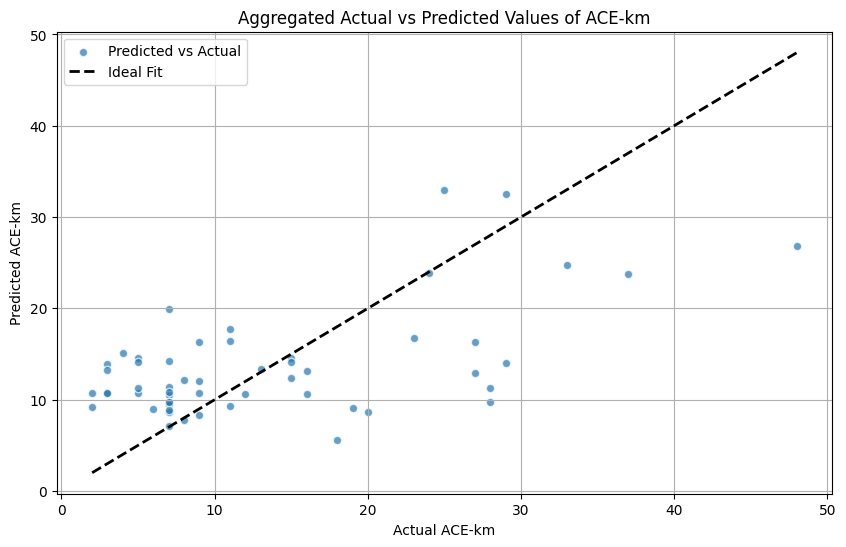


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 68.3436
R-squared: 0.3411


2024-11-10 15:19:23.075516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 144ms/step


2024-11-10 15:19:29.605098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:19:30.005716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 191ms/step


2024-11-10 15:19:36.519702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:19:36.958800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 227ms/step


2024-11-10 15:19:43.780653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:19:44.235827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 127ms/step


2024-11-10 15:19:50.487654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:19:50.858406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 199ms/step


2024-11-10 15:19:57.116694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:19:57.567079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 132ms/step


2024-11-10 15:20:03.626828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:20:04.013974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 178ms/step


2024-11-10 15:20:10.389448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:20:10.825628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 98ms/step


2024-11-10 15:20:17.069167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:20:17.410771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 172ms/step


2024-11-10 15:20:23.767713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:20:24.185605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 127ms/step


2024-11-10 15:20:30.364935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:20:30.740796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 122ms/step


2024-11-10 15:20:36.942476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:20:37.302041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 120ms/step


2024-11-10 15:20:39.488514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:20:39.848572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 129ms/step


2024-11-10 15:20:45.965628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:20:46.338084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 127ms/step


2024-11-10 15:20:52.472532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:20:52.842262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 169ms/step


2024-11-10 15:20:59.178333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:20:59.595394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 124ms/step


2024-11-10 15:21:05.712377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:21:06.061630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 158ms/step


2024-11-10 15:21:09.860404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-10 15:21:10.253386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 105ms/step


2024-11-10 15:21:16.402506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


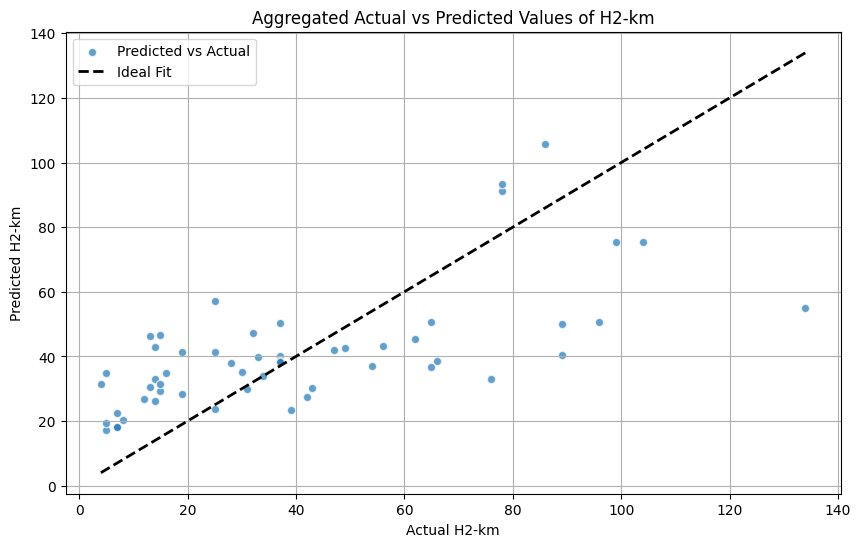


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 542.7433
R-squared: 0.4332


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model


# Target columns
target_columns = ['ACE-km', 'H2-km']

# Clean the data and remove rows with 'x'
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

# Identify digester columns and define groups
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Apply MinMax normalization only to non-target columns
non_target_columns = df_cleaned.select_dtypes(include=[np.number]).columns.difference(target_columns)
scaler = MinMaxScaler()
df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])

df_cleaned = df_cleaned.astype(np.float32)

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# Perform cross-validation for each target
for target_column in target_columns:
    # Prepare data for the target variable
    X = df_cleaned.drop(columns=target_columns).values
    y = df_cleaned[target_column].values

    # Reshape X for Conv1D
    X = X.reshape(X.shape[0], X.shape[1], 1)

    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        # Split data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build and train the model
        model = build_model((X_train.shape[1], 1))
        early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, callbacks=[early_stopping])

        # Predict and store results
        y_pred = model.predict(X_test).flatten()
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Evaluate model performance
    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print overall results
    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


2024-11-11 16:37:44.898396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:37:58.540183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 626ms/step


2024-11-11 16:37:59.736130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:38:12.534456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 502ms/step


2024-11-11 16:38:16.589137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:38:23.072875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 687ms/step


2024-11-11 16:38:24.301447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:38:29.999945: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 586ms/step


2024-11-11 16:38:31.078851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:38:44.800082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 852ms/step


2024-11-11 16:38:46.158388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:38:51.157132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 575ms/step


2024-11-11 16:38:52.221349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:39:03.208178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 642ms/step


2024-11-11 16:39:04.353591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:39:16.114527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 600ms/step


2024-11-11 16:39:17.192703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:39:22.362655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 550ms/step


2024-11-11 16:39:23.400791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:39:28.104880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 617ms/step


2024-11-11 16:39:29.381679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:39:41.867063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 594ms/step


2024-11-11 16:39:42.970781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:39:47.596521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 576ms/step


2024-11-11 16:39:51.363258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:40:05.480962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 753ms/step


2024-11-11 16:40:06.747694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:40:20.278249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 587ms/step


2024-11-11 16:40:21.359367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:40:35.899663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 505ms/step


2024-11-11 16:40:36.895830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:40:42.046514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 513ms/step


2024-11-11 16:40:43.038577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:40:51.119082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 597ms/step


2024-11-11 16:40:52.224053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:41:02.812664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 570ms/step


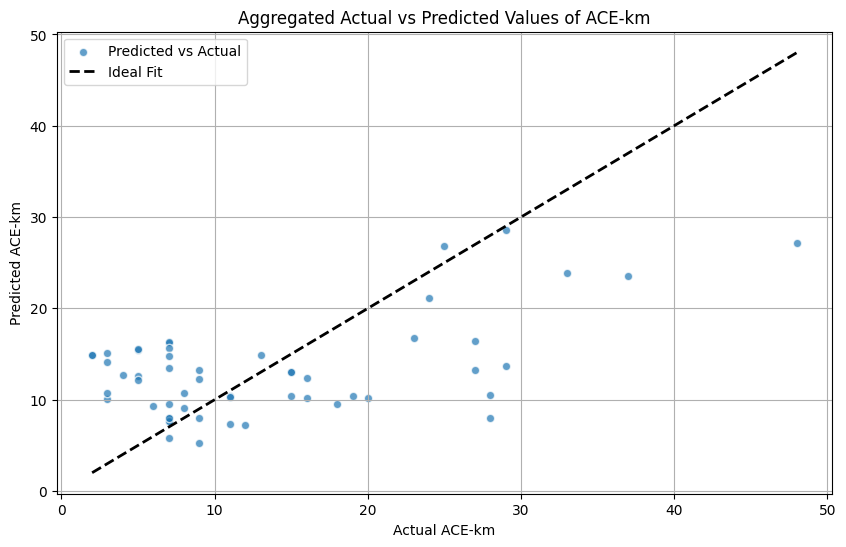


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 72.0554
R-squared: 0.3053


2024-11-11 16:41:04.043502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:41:10.014337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 632ms/step


2024-11-11 16:41:11.170836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:41:23.251986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 596ms/step


2024-11-11 16:41:24.358791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:41:36.221871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 650ms/step


2024-11-11 16:41:37.391746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:41:42.629712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 624ms/step


2024-11-11 16:41:46.314778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:42:00.436499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 745ms/step


2024-11-11 16:42:01.705417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:42:14.597038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 686ms/step


2024-11-11 16:42:15.778901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:42:30.731524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 623ms/step


2024-11-11 16:42:31.847790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:42:45.272918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 660ms/step


2024-11-11 16:42:46.443310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:42:51.720133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 613ms/step


2024-11-11 16:42:52.822354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:47:04.560659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 550ms/step


2024-11-11 16:47:05.713996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:47:17.277275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 560ms/step


2024-11-11 16:47:18.334892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:47:33.102757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 631ms/step


2024-11-11 16:47:34.221499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:47:39.427145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 608ms/step


2024-11-11 16:47:40.524943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:47:45.764110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 550ms/step


2024-11-11 16:47:49.198892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:48:01.792102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 635ms/step


2024-11-11 16:48:02.939685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:48:08.964293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 599ms/step


2024-11-11 16:48:10.037666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:48:19.683573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 700ms/step


2024-11-11 16:48:20.890198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:48:36.503822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 742ms/step


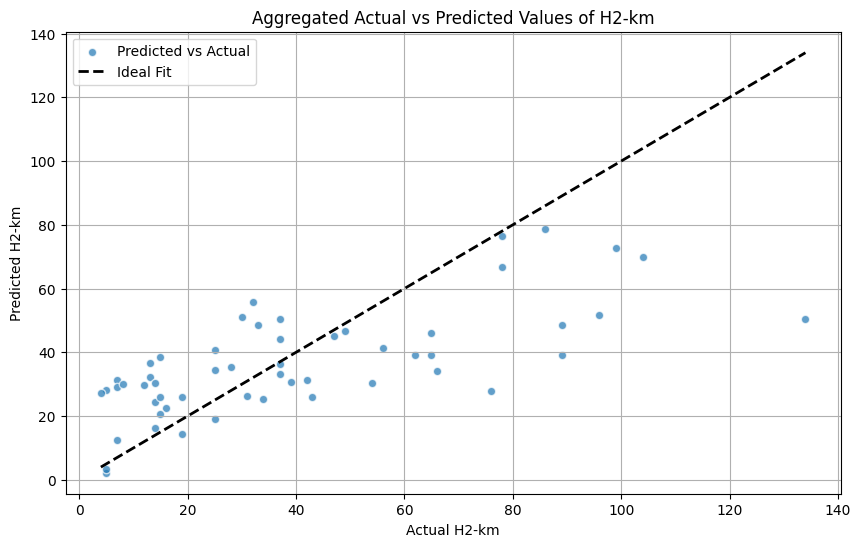


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 524.9712
R-squared: 0.4517


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        Dropout(0.3),
        # Conv1D(filters=128, kernel_size=3, activation='relu'),
        # Conv1D(filters=128, kernel_size=3, activation='relu'),
        # Conv1D(filters=128, kernel_size=3, activation='relu'),
        # Dropout(0.3),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model


# Target columns
target_columns = ['ACE-km', 'H2-km']

# Clean the data and remove rows with 'x'
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

# Identify digester columns and define groups
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Apply MinMax normalization only to non-target columns
non_target_columns = df_cleaned.select_dtypes(include=[np.number]).columns.difference(target_columns)
scaler = MinMaxScaler()
df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])

df_cleaned = df_cleaned.astype(np.float32)

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# Perform cross-validation for each target
for target_column in target_columns:
    # Prepare data for the target variable
    X = df_cleaned.drop(columns=target_columns).values
    y = df_cleaned[target_column].values

    # Reshape X for Conv1D
    X = X.reshape(X.shape[0], X.shape[1], 1)

    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        # Split data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build and train the model
        model = build_model((X_train.shape[1], 1))
        early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, callbacks=[early_stopping])

        # Predict and store results
        y_pred = model.predict(X_test).flatten()
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Evaluate model performance
    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print overall results
    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Function to build the neural network model
# def build_model(input_shape):
#     model = Sequential([
#         Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
#         Conv1D(filters=64, kernel_size=3, activation='relu'),
#         Dropout(0.3),
#         Conv1D(filters=32, kernel_size=3, activation='relu'),
#         Conv1D(filters=32, kernel_size=3, activation='relu'),
#         Dropout(0.3),
#         Flatten(),
#         Dense(32, activation='relu'),
#         Dense(1)
#     ])
#     model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
#     return model

def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Dropout(0.3),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

# Custom RFE-like feature selection function for neural network model
def custom_rfe_nn(df, target_column, n_features_to_select):
    non_target_columns = df.select_dtypes(include=[np.number]).columns.difference([target_column])
    selected_features = list(non_target_columns)  # Start with all features

    while len(selected_features) > n_features_to_select:
        feature_losses = {}
        
        # Evaluate the model performance by removing one feature at a time
        for feature in selected_features:
            current_features = [f for f in selected_features if f != feature]
            mse_loss = evaluate_nn_model(df[current_features], df[target_column], groups, target_column)
            feature_losses[feature] = mse_loss

        # Find the feature whose removal increases the loss the least
        least_important_feature = min(feature_losses, key=feature_losses.get)
        selected_features.remove(least_important_feature)
        print(f"Removed feature: {least_important_feature} (MSE: {feature_losses[least_important_feature]:.4f})")

    return selected_features

# Evaluate model function for given features (used within custom RFE)
def evaluate_nn_model(X, y, groups, target_column):
    # Reshape X for Conv1D
    X = X.values.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    y = y.values.astype(np.float32)

    # Initialize Leave-One-Group-Out cross-validator
    logo = LeaveOneGroupOut()
    y_tests, y_preds = [], []

    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build and train the model
        model = build_model((X_train.shape[1], 1))
        early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, callbacks=[early_stopping])

        # Predict and store results
        y_pred = model.predict(X_test).flatten()
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Calculate and return the MSE as the performance metric
    mse_loss = mean_squared_error(y_tests, y_preds)
    return mse_loss

# Main code for performing feature selection and evaluating the final model
target_columns = ['ACE-km', 'H2-km']
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

# Identify digester columns and define groups
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Normalize only the non-target columns
scaler = MinMaxScaler()
non_target_columns = df_cleaned.select_dtypes(include=[np.number]).columns.difference(target_columns)
df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])
df_cleaned = df_cleaned.astype(np.float32)

# Perform feature selection for each target
for target_column in target_columns:
    selected_features = custom_rfe_nn(df_cleaned, target_column, n_features_to_select=10)
    print(f"\nSelected features for {target_column}: {selected_features}")

    # Final evaluation using selected features
    X_final = df_cleaned[selected_features]
    y_final = df_cleaned[target_column]
    mse_loss = evaluate_nn_model(X_final, y_final, groups, target_column)

    print(f"\nFinal Cross-Validation MSE for {target_column} with selected features: {mse_loss:.4f}")


2024-11-11 16:20:02.034952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:20:08.178926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 398ms/step


2024-11-11 16:20:09.132421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:20:14.809249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 336ms/step


2024-11-11 16:20:16.021778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:20:22.634926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 463ms/step


2024-11-11 16:20:23.676089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:20:32.064775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 433ms/step


2024-11-11 16:20:33.047690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:20:36.909117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 411ms/step


2024-11-11 16:20:37.864283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:20:45.111233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 446ms/step


2024-11-11 16:20:46.108989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:20:52.728115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 413ms/step


2024-11-11 16:20:53.693444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:21:01.049957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 356ms/step


2024-11-11 16:21:01.931890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:21:08.142884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 416ms/step


2024-11-11 16:21:10.831931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:21:19.400355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 461ms/step


2024-11-11 16:21:20.412147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:21:27.300232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 547ms/step


2024-11-11 16:21:28.443799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:21:32.796496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 476ms/step


2024-11-11 16:21:33.792656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:21:39.895067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 391ms/step


2024-11-11 16:21:40.976373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:21:50.577740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 465ms/step


2024-11-11 16:21:51.653282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:21:57.686213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 509ms/step


2024-11-11 16:21:58.793894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:22:07.592123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 368ms/step


2024-11-11 16:22:08.651041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:22:14.194128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 452ms/step


2024-11-11 16:22:18.252900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:22:25.449331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 516ms/step


2024-11-11 16:22:26.590264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:22:34.032607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 491ms/step


2024-11-11 16:22:35.067931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:22:40.891439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 451ms/step


2024-11-11 16:22:41.878881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:22:47.664215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 404ms/step


2024-11-11 16:22:48.647665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:22:55.785058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 472ms/step


2024-11-11 16:22:56.781575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:23:03.681429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 433ms/step


2024-11-11 16:23:04.632878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:23:13.266092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 419ms/step


2024-11-11 16:23:14.207946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:23:18.281647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 441ms/step


2024-11-11 16:23:21.020317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:23:27.232522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 467ms/step


2024-11-11 16:23:28.256040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:23:36.179435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 645ms/step


2024-11-11 16:23:37.412710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:23:46.375919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 594ms/step


2024-11-11 16:23:47.574103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:23:53.376079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 541ms/step


2024-11-11 16:23:54.526030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:24:01.555629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 464ms/step


2024-11-11 16:24:02.614630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:24:09.585114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 441ms/step


2024-11-11 16:24:10.595509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:24:17.609917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 495ms/step


2024-11-11 16:24:18.665347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:24:25.311930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 591ms/step


2024-11-11 16:24:28.512697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:24:38.387112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 624ms/step


2024-11-11 16:24:39.584979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:24:44.206600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 525ms/step


2024-11-11 16:24:45.278295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:24:51.680425: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 494ms/step


2024-11-11 16:24:52.760342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:25:00.579983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 515ms/step


2024-11-11 16:25:01.627270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:25:10.192757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 470ms/step


2024-11-11 16:25:11.186454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:25:17.986470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 454ms/step


2024-11-11 16:25:18.977891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:25:27.177177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 655ms/step


2024-11-11 16:25:30.365236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:25:36.799229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 552ms/step


2024-11-11 16:25:37.953547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:25:46.551856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 707ms/step


2024-11-11 16:25:47.897378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:25:57.797015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 471ms/step


2024-11-11 16:25:58.796832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:26:06.120001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 455ms/step


2024-11-11 16:26:07.098581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:26:14.097752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 503ms/step


2024-11-11 16:26:15.122639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:26:22.588157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 832ms/step


2024-11-11 16:26:24.045356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:26:29.988461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 553ms/step


2024-11-11 16:26:31.075533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:26:38.306508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 511ms/step


2024-11-11 16:26:39.408510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:26:49.598452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 868ms/step


2024-11-11 16:26:53.628745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:27:02.057493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 844ms/step


2024-11-11 16:27:03.450814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:27:09.112800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 485ms/step


2024-11-11 16:27:10.140388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:27:18.634302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 517ms/step


2024-11-11 16:27:19.672627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:27:23.914494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 729ms/step


2024-11-11 16:27:25.209108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:27:32.028243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 561ms/step


2024-11-11 16:27:33.208486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:27:40.304039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 456ms/step


2024-11-11 16:27:41.322669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:27:49.302665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 543ms/step


2024-11-11 16:27:50.382919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-11 16:27:59.658961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step


2024-11-11 16:28:01.061707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_19057/4042852546.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 689ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 693ms/step


1/1 [==============================] - 1s 663ms/step


1/1 [==============================] - 1s 667ms/step


1/1 [==============================] - 1s 702ms/step


1/1 [==============================] - 1s 710ms/step


1/1 [==============================] - 1s 693ms/step


1/1 [==============================] - 0s 309ms/step


1/1 [==============================] - 1s 708ms/step


1/1 [==============================] - 0s 294ms/step


1/1 [==============================] - 1s 687ms/step


1/1 [==============================] - 1s 716ms/step


1/1 [==============================] - 1s 718ms/step


1/1 [==============================] - 1s 882ms/step


1/1 [==============================] - 1s 707ms/step


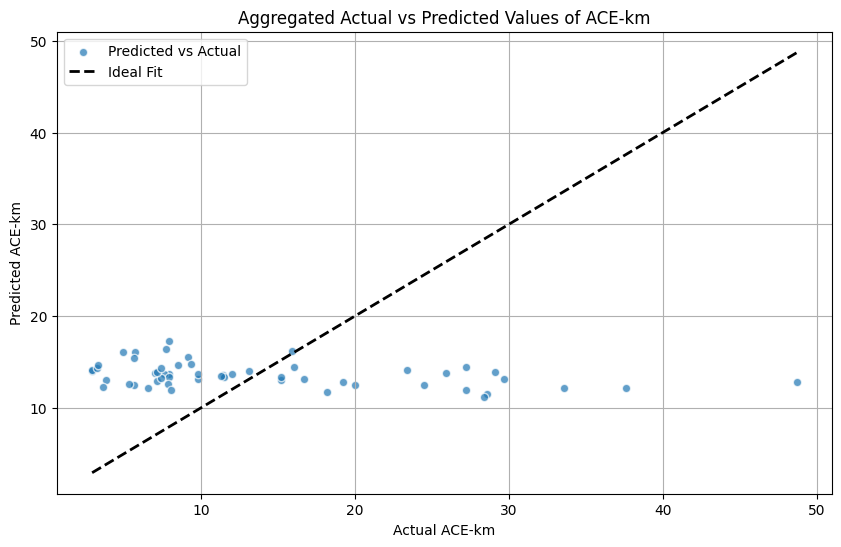


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 115.1482
R-squared: -0.1151


1/1 [==============================] - 1s 725ms/step


1/1 [==============================] - 1s 726ms/step


1/1 [==============================] - 0s 409ms/step


1/1 [==============================] - 0s 396ms/step


1/1 [==============================] - 1s 724ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 721ms/step


1/1 [==============================] - 1s 737ms/step


1/1 [==============================] - 1s 882ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


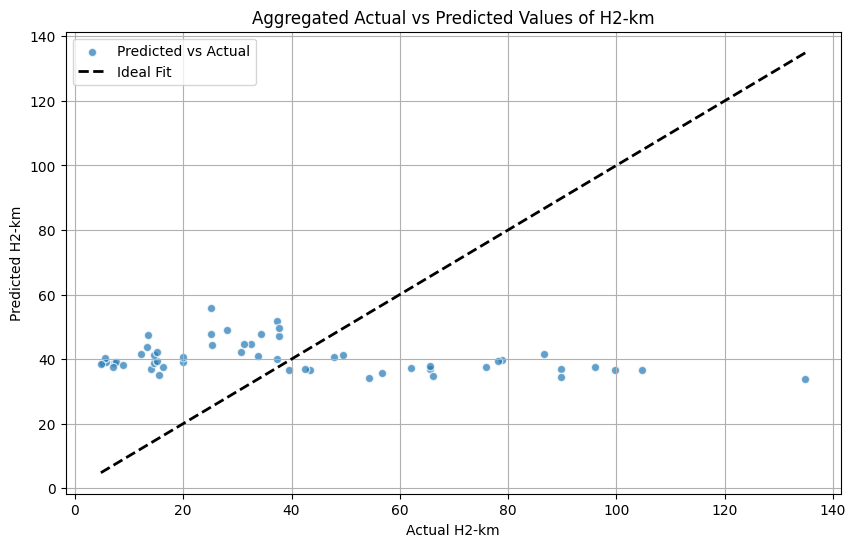


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 1081.8837
R-squared: -0.1256


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, Flatten, Add, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# Function to build the ResNet model for 1D data with adjustable shortcut layers
def build_resnet_model(input_shape):
    inputs = Input(shape=input_shape)

    # Initial Conv Layer
    x = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(inputs)
    
    # Residual Block 1
    x_shortcut = Conv1D(64, kernel_size=1, padding='same')(x)
    x = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(x)
    x = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(x)
    x = Add()([x, x_shortcut])  # Skip connection
    
    # Residual Block 2 with filter adjustment in shortcut path
    x_shortcut = Conv1D(128, kernel_size=1, padding='same')(x)
    x = Conv1D(filters=128, kernel_size=1, activation='relu', padding='same')(x)
    x = Conv1D(filters=128, kernel_size=1, activation='relu', padding='same')(x)
    x = Add()([x, x_shortcut])  # Skip connection
    
    # Residual Block 3 with filter adjustment in shortcut path
    x_shortcut = Conv1D(256, kernel_size=1, padding='same')(x)
    x = Conv1D(filters=256, kernel_size=1, activation='relu', padding='same')(x)
    x = Conv1D(filters=256, kernel_size=1, activation='relu', padding='same')(x)
    x = Add()([x, x_shortcut])  # Skip connection
    
    # Global Average Pooling and Dense Layers
    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.1)(x)
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

target_columns = ['ACE-km', 'H2-km']

df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Apply MinMax normalization only to non-target columns
non_target_columns = df_cleaned.columns.difference(target_columns)
scaler = MinMaxScaler()
df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])

df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

        model = build_resnet_model((X_train.shape[1], 1))

        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        y_pred = model.predict(X_test).flatten()

        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_19057/1231657014.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])


1/1 [==============================] - 1s 768ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 954ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 942ms/step


1/1 [==============================] - 1s 833ms/step


1/1 [==============================] - 1s 760ms/step


1/1 [==============================] - 1s 879ms/step


1/1 [==============================] - 1s 543ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 698ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 812ms/step


1/1 [==============================] - 1s 766ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 874ms/step


1/1 [==============================] - 1s 1s/step


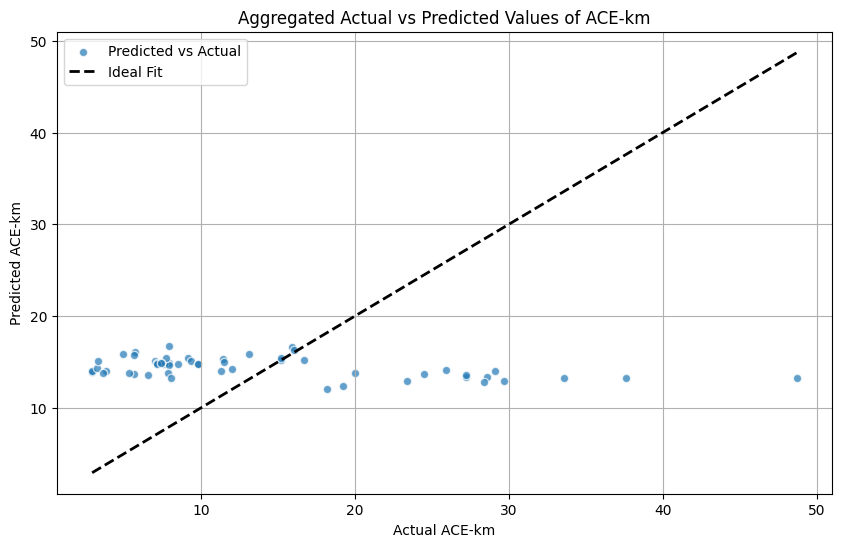


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 114.8914
R-squared: -0.1126


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 977ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 827ms/step


1/1 [==============================] - 1s 837ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 831ms/step


1/1 [==============================] - 1s 989ms/step


1/1 [==============================] - 1s 633ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 979ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 968ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


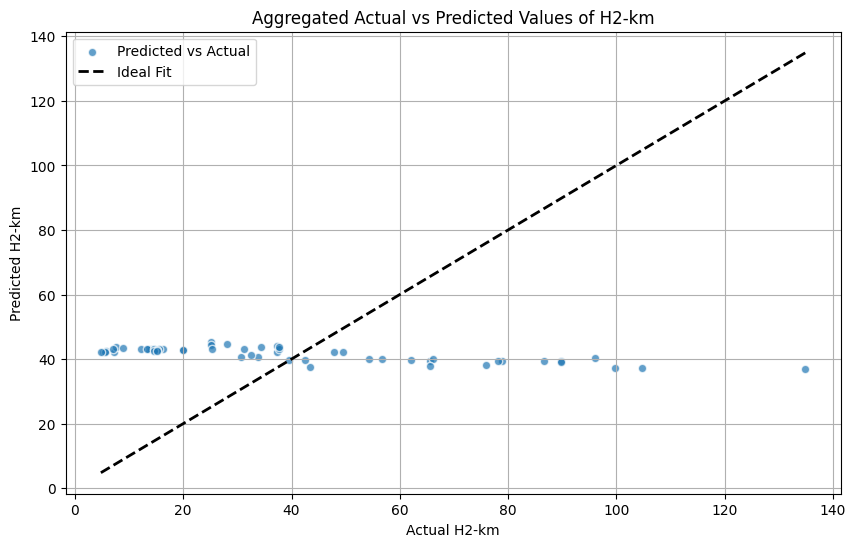


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 1072.8032
R-squared: -0.1162


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, GlobalAveragePooling1D, Add, LayerNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# Function to build a Temporal Convolutional Network (TCN) model with matching shortcut layers
def build_tcn_model(input_shape):
    inputs = Input(shape=input_shape)

    # First TCN Block with dilation rate = 1
    x = Conv1D(filters=64, kernel_size=3, padding='causal', activation='relu', dilation_rate=1)(inputs)
    x = LayerNormalization()(x)
    x = Dropout(0.1)(x)
    
    # Second TCN Block with dilation rate = 2 and matching shortcut path
    x_shortcut = Conv1D(128, kernel_size=1, padding='same')(x)
    x = Conv1D(filters=128, kernel_size=3, padding='causal', activation='relu', dilation_rate=2)(x)
    x = LayerNormalization()(x)
    x = Dropout(0.1)(x)
    x = Add()([x, x_shortcut])  # Residual connection
    
    # Third TCN Block with dilation rate = 4 and matching shortcut path
    x_shortcut = Conv1D(256, kernel_size=1, padding='same')(x)
    x = Conv1D(filters=256, kernel_size=3, padding='causal', activation='relu', dilation_rate=4)(x)
    x = LayerNormalization()(x)
    x = Dropout(0.1)(x)
    x = Add()([x, x_shortcut])  # Residual connection

    # Global Pooling and Dense Layers
    x = GlobalAveragePooling1D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    outputs = Dense(1)(x)
    
    model = Model(inputs, outputs)
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

target_columns = ['ACE-km', 'H2-km']

df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Apply MinMax normalization only to non-target columns
non_target_columns = df_cleaned.columns.difference(target_columns)
scaler = MinMaxScaler()
df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])

df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

        model = build_tcn_model((X_train.shape[1], 1))

        model.fit(X_train, y_train, epochs=25, batch_size=16, verbose=0)

        y_pred = model.predict(X_test).flatten()

        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_19057/2947105052.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])



Training and evaluating LSTM model...



1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


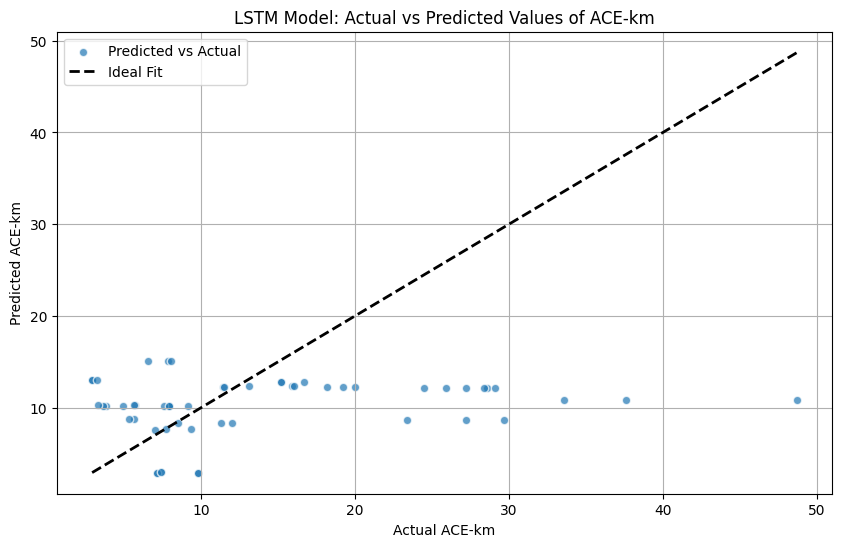

LSTM Model - ACE-km:
Mean Squared Error: 114.7896
R-squared: -0.1116



1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


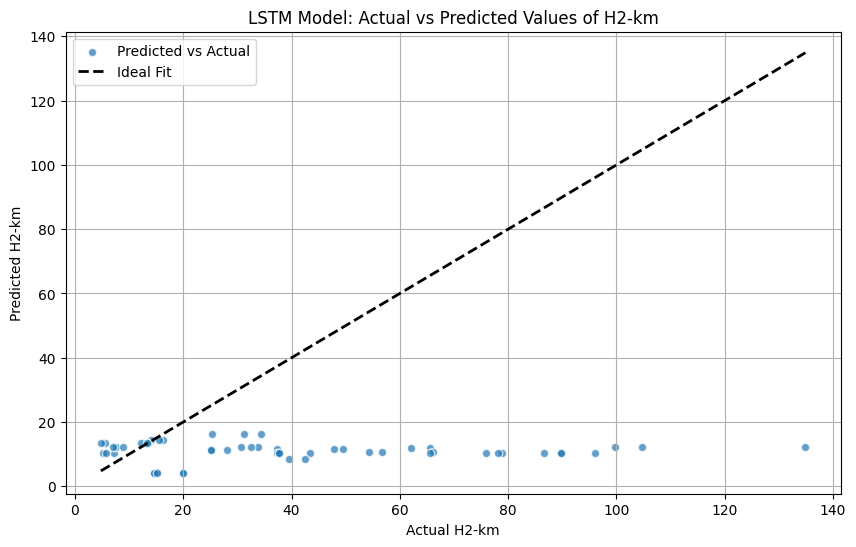

LSTM Model - H2-km:
Mean Squared Error: 1829.4620
R-squared: -0.9035


Training and evaluating CNN model...



1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 654ms/step


1/1 [==============================] - 1s 718ms/step


1/1 [==============================] - 1s 692ms/step


1/1 [==============================] - 1s 840ms/step


1/1 [==============================] - 1s 727ms/step


1/1 [==============================] - 1s 695ms/step


1/1 [==============================] - 1s 785ms/step


1/1 [==============================] - 1s 970ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 876ms/step


1/1 [==============================] - 1s 622ms/step


1/1 [==============================] - 1s 862ms/step


1/1 [==============================] - 1s 837ms/step


1/1 [==============================] - 1s 697ms/step


1/1 [==============================] - 1s 764ms/step


1/1 [==============================] - 1s 658ms/step


1/1 [==============================] - 1s 1s/step


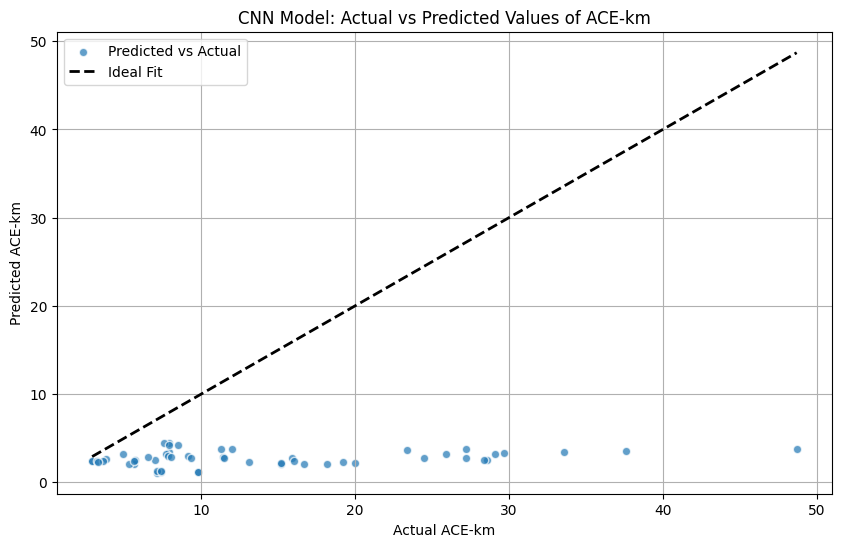

CNN Model - ACE-km:
Mean Squared Error: 224.2720
R-squared: -1.1719



1/1 [==============================] - 1s 765ms/step


1/1 [==============================] - 1s 819ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 0s 387ms/step


1/1 [==============================] - 1s 763ms/step


1/1 [==============================] - 1s 688ms/step


1/1 [==============================] - 1s 791ms/step


1/1 [==============================] - 1s 503ms/step


1/1 [==============================] - 1s 909ms/step


1/1 [==============================] - 1s 912ms/step


1/1 [==============================] - 1s 791ms/step


1/1 [==============================] - 1s 631ms/step


1/1 [==============================] - 1s 860ms/step


1/1 [==============================] - 1s 920ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 820ms/step


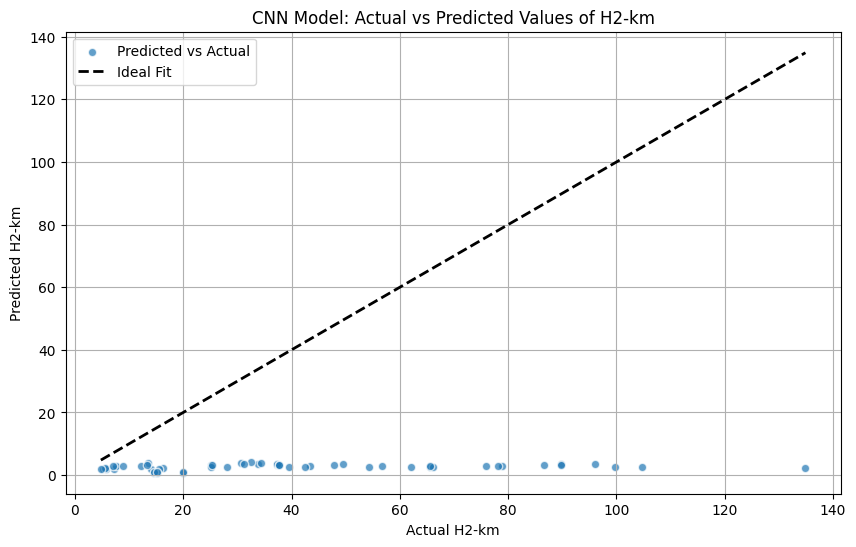

CNN Model - H2-km:
Mean Squared Error: 2368.0066
R-squared: -1.4638


Training and evaluating CNN-LSTM model...



1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 2s 2s/step


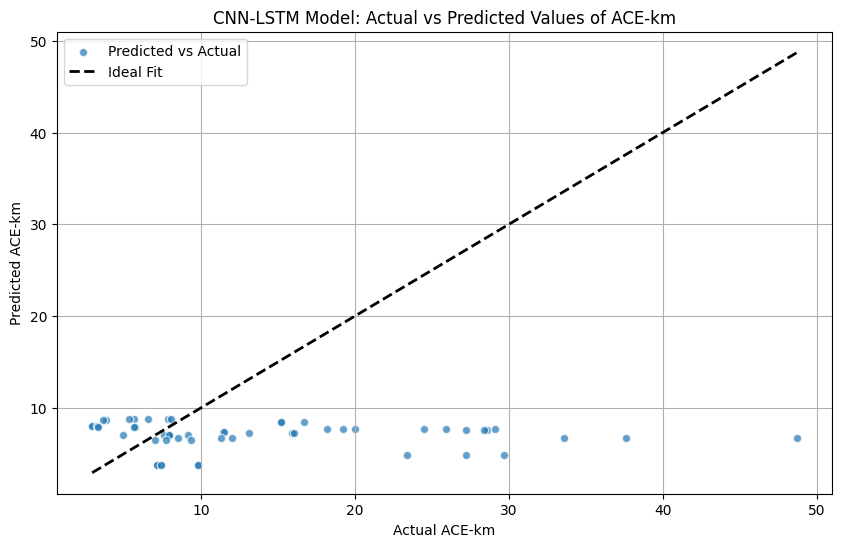

CNN-LSTM Model - ACE-km:
Mean Squared Error: 155.4971
R-squared: -0.5059



1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 965ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 3s 3s/step


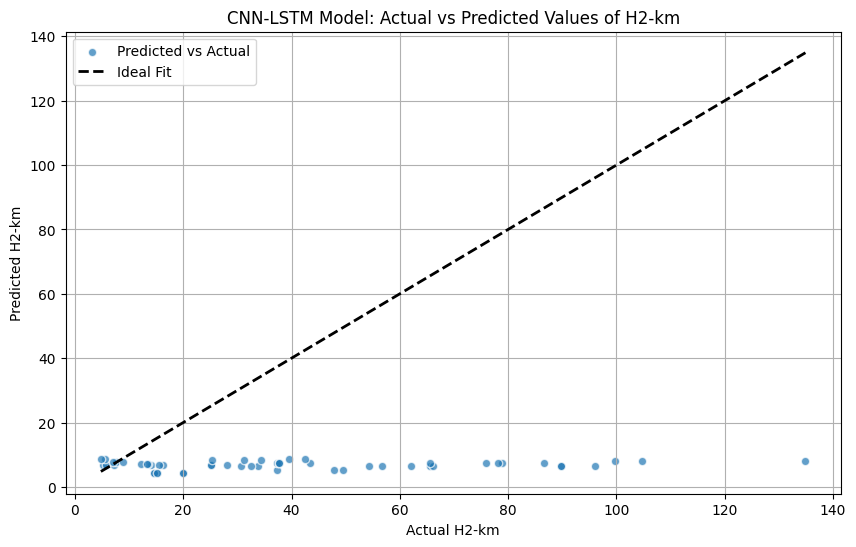

CNN-LSTM Model - H2-km:
Mean Squared Error: 2075.1174
R-squared: -1.1591



In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Conv1D, GlobalAveragePooling1D, Add, MultiHeadAttention, LayerNormalization
from tensorflow.keras.optimizers import Adam

# Load and prepare data
target_columns = ['ACE-km', 'H2-km']
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]
groups = df_cleaned[digester_columns].idxmax(axis=1)

# MinMax normalization for non-target columns
non_target_columns = df_cleaned.columns.difference(target_columns)
scaler = MinMaxScaler()
df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])
df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

# Model Functions
def build_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Dense(64, activation='relu')(inputs)
    attn_output = MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    attn_output = Add()([x, attn_output])
    attn_output = LayerNormalization()(attn_output)
    ffn_output = Dense(128, activation='relu')(attn_output)
    ffn_output = Dense(64, activation='relu')(ffn_output)
    ffn_output = Add()([attn_output, ffn_output])
    x = LayerNormalization()(ffn_output)
    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.1)(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = LSTM(64, return_sequences=True)(inputs)
    x = LSTM(64)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

def build_cnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = GlobalAveragePooling1D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

def build_cnn_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = LSTM(64)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

# Dictionary to store each model function
model_functions = {
    # "Transformer": build_transformer_model,
    "LSTM": build_lstm_model,
    "CNN": build_cnn_model,
    "CNN-LSTM": build_cnn_lstm_model
}

# Training and Evaluation Function
def train_and_evaluate_models():
    for model_name, model_func in model_functions.items():
        print(f"\nTraining and evaluating {model_name} model...\n")
        for target_column in target_columns:
            X = df_cleaned.drop(columns=target_columns).values  
            y = df_cleaned[target_column].values
            X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)

            y_tests, y_preds = [], []

            for train_index, test_index in logo.split(X, y, groups):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                y_train, y_test = y_train.astype(np.float32), y_test.astype(np.float32)
                
                model = model_func((X_train.shape[1], 1))
                model.fit(X_train, y_train, epochs=25, batch_size=16, verbose=0)
                
                y_pred = model.predict(X_test).flatten()
                y_tests.extend(y_test)
                y_preds.extend(y_pred)

            mse_overall = mean_squared_error(y_tests, y_preds)
            r2_overall = r2_score(y_tests, y_preds)

            # Scatter Plot
            plt.figure(figsize=(10, 6))
            plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
            plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
            plt.xlabel(f'Actual {target_column}')
            plt.ylabel(f'Predicted {target_column}')
            plt.title(f'{model_name} Model: Actual vs Predicted Values of {target_column}')
            plt.legend()
            plt.grid(True)
            plt.show()

            print(f"{model_name} Model - {target_column}:")
            print(f"Mean Squared Error: {mse_overall:.4f}")
            print(f"R-squared: {r2_overall:.4f}\n")

# Run the training and evaluation for all models
train_and_evaluate_models()


## VGG16

/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_76050/2920673472.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])


Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 299.5065 - mae: 13.8274
Epoch 1: val_loss improved from inf to 226.99982, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 3s 3s/step - loss: 299.5065 - mae: 13.8274 - val_loss: 226.9998 - val_mae: 14.9978 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 297.9285 - mae: 13.8253
Epoch 2: val_loss improved from 226.99982 to 226.87526, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 144ms/step - loss: 297.9285 - mae: 13.8253 - val_loss: 226.8753 - val_mae: 14.9937 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 296.5383 - mae: 13.8231
Epoch 3: val_loss improved from 226.87526 to 226.74994, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 138ms/step - loss: 296.5383 - mae: 13.8231 - val_loss: 226.7499 - val_mae: 14.9895 - l

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 276.1898 - mae: 13.1353
Epoch 1: val_loss improved from inf to 723.36768, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 276.1898 - mae: 13.1353 - val_loss: 723.3677 - val_mae: 26.7657 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 274.1654 - mae: 13.1332
Epoch 2: val_loss improved from 723.36768 to 723.26251, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 137ms/step - loss: 274.1654 - mae: 13.1332 - val_loss: 723.2625 - val_mae: 26.7637 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 272.4242 - mae: 13.1310
Epoch 3: val_loss improved from 723.26251 to 723.15948, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 139ms/step - loss: 272.4242 - mae: 13.1310 - val_loss: 723.1595 - val_mae: 26.7618 - l

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 300.2963 - mae: 13.9865
Epoch 1: val_loss improved from inf to 131.25922, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 300.2963 - mae: 13.9865 - val_loss: 131.2592 - val_mae: 11.4454 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 298.3306 - mae: 13.9844
Epoch 2: val_loss improved from 131.25922 to 131.23380, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 142ms/step - loss: 298.3306 - mae: 13.9844 - val_loss: 131.2338 - val_mae: 11.4443 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 296.7773 - mae: 13.9823
Epoch 3: val_loss improved from 131.23380 to 131.21114, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 138ms/step - loss: 296.7773 - mae: 13.9823 - val_loss: 131.2111 - val_mae: 11.4433 - l

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 313.6674 - mae: 14.2804
Epoch 1: val_loss improved from inf to 56.56758, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 313.6674 - mae: 14.2804 - val_loss: 56.5676 - val_mae: 7.2929 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 311.3678 - mae: 14.2783
Epoch 2: val_loss improved from 56.56758 to 56.54944, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 123ms/step - loss: 311.3678 - mae: 14.2783 - val_loss: 56.5494 - val_mae: 7.2916 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 309.0534 - mae: 14.2763
Epoch 3: val_loss improved from 56.54944 to 56.53276, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 139ms/step - loss: 309.0534 - mae: 14.2763 - val_loss: 56.5328 - val_mae: 7.2905 - lr: 1.0000e-

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 267.3223 - mae: 13.0588
Epoch 1: val_loss improved from inf to 788.25360, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 267.3223 - mae: 13.0588 - val_loss: 788.2536 - val_mae: 28.0644 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 264.2814 - mae: 13.0567
Epoch 2: val_loss improved from 788.25360 to 788.17303, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 139ms/step - loss: 264.2814 - mae: 13.0567 - val_loss: 788.1730 - val_mae: 28.0630 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 261.9061 - mae: 13.0546
Epoch 3: val_loss improved from 788.17303 to 788.09601, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 146ms/step - loss: 261.9061 - mae: 13.0546 - val_loss: 788.0960 - val_mae: 28.0616 - l

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 323.1051 - mae: 14.2510
Epoch 1: val_loss improved from inf to 61.13025, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 323.1051 - mae: 14.2510 - val_loss: 61.1302 - val_mae: 7.8007 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 320.2584 - mae: 14.2489
Epoch 2: val_loss improved from 61.13025 to 61.07618, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 142ms/step - loss: 320.2584 - mae: 14.2489 - val_loss: 61.0762 - val_mae: 7.7973 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 317.2780 - mae: 14.2468
Epoch 3: val_loss improved from 61.07618 to 61.02334, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 146ms/step - loss: 317.2780 - mae: 14.2468 - val_loss: 61.0233 - val_mae: 7.7939 - lr: 1.0000e-

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 273.1161 - mae: 13.1510
Epoch 1: val_loss improved from inf to 706.27863, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 273.1161 - mae: 13.1510 - val_loss: 706.2786 - val_mae: 26.5011 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 271.1936 - mae: 13.1490
Epoch 2: val_loss improved from 706.27863 to 706.06396, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 147ms/step - loss: 271.1936 - mae: 13.1490 - val_loss: 706.0640 - val_mae: 26.4971 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 269.8243 - mae: 13.1470
Epoch 3: val_loss improved from 706.06396 to 705.85297, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 129ms/step - loss: 269.8243 - mae: 13.1470 - val_loss: 705.8530 - val_mae: 26.4931 - l

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 328.4959 - mae: 14.0863
Epoch 1: val_loss improved from inf to 114.97768, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 328.4959 - mae: 14.0863 - val_loss: 114.9777 - val_mae: 10.6034 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 323.4112 - mae: 14.0842
Epoch 2: val_loss improved from 114.97768 to 114.92153, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 135ms/step - loss: 323.4112 - mae: 14.0842 - val_loss: 114.9215 - val_mae: 10.6008 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 319.6149 - mae: 14.0821
Epoch 3: val_loss improved from 114.92153 to 114.86648, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 134ms/step - loss: 319.6149 - mae: 14.0821 - val_loss: 114.8665 - val_mae: 10.5982 - l

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 312.1589 - mae: 14.2173
Epoch 1: val_loss improved from inf to 29.96206, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 312.1589 - mae: 14.2173 - val_loss: 29.9621 - val_mae: 5.4479 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 309.4103 - mae: 14.2151
Epoch 2: val_loss improved from 29.96206 to 29.94267, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 154ms/step - loss: 309.4103 - mae: 14.2151 - val_loss: 29.9427 - val_mae: 5.4461 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 307.1549 - mae: 14.2129
Epoch 3: val_loss improved from 29.94267 to 29.92375, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 134ms/step - loss: 307.1549 - mae: 14.2129 - val_loss: 29.9238 - val_mae: 5.4444 - lr: 1.0000e-

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 309.6888 - mae: 14.5333
Epoch 1: val_loss improved from inf to 9.25209, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 309.6888 - mae: 14.5333 - val_loss: 9.2521 - val_mae: 2.9955 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 308.1710 - mae: 14.5313
Epoch 2: val_loss improved from 9.25209 to 9.23385, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 146ms/step - loss: 308.1710 - mae: 14.5313 - val_loss: 9.2338 - val_mae: 2.9925 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 307.1107 - mae: 14.5293
Epoch 3: val_loss improved from 9.23385 to 9.21607, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 157ms/step - loss: 307.1107 - mae: 14.5293 - val_loss: 9.2161 - val_mae: 2.9896 - lr: 1.0000e-04
Epoch

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 303.5122 - mae: 14.2846
Epoch 1: val_loss improved from inf to 13.93095, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 3s 3s/step - loss: 303.5122 - mae: 14.2846 - val_loss: 13.9310 - val_mae: 3.6961 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 301.9730 - mae: 14.2826
Epoch 2: val_loss improved from 13.93095 to 13.92442, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 138ms/step - loss: 301.9730 - mae: 14.2826 - val_loss: 13.9244 - val_mae: 3.6953 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 300.6756 - mae: 14.2806
Epoch 3: val_loss improved from 13.92442 to 13.91822, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 136ms/step - loss: 300.6756 - mae: 14.2806 - val_loss: 13.9182 - val_mae: 3.6945 - lr: 1.0000e-

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 284.8965 - mae: 13.5843
Epoch 1: val_loss improved from inf to 366.78085, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 284.8965 - mae: 13.5843 - val_loss: 366.7809 - val_mae: 19.1306 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 283.3054 - mae: 13.5822
Epoch 2: val_loss improved from 366.78085 to 366.74719, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 138ms/step - loss: 283.3054 - mae: 13.5822 - val_loss: 366.7472 - val_mae: 19.1297 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 282.1891 - mae: 13.5801
Epoch 3: val_loss improved from 366.74719 to 366.71365, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 135ms/step - loss: 282.1891 - mae: 13.5801 - val_loss: 366.7137 - val_mae: 19.1289 - l

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 291.9796 - mae: 13.7863
Epoch 1: val_loss improved from inf to 247.09444, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 291.9796 - mae: 13.7863 - val_loss: 247.0944 - val_mae: 15.6950 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 291.0139 - mae: 13.7841
Epoch 2: val_loss improved from 247.09444 to 247.04488, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 141ms/step - loss: 291.0139 - mae: 13.7841 - val_loss: 247.0449 - val_mae: 15.6935 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 290.3646 - mae: 13.7820
Epoch 3: val_loss improved from 247.04488 to 246.99841, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 143ms/step - loss: 290.3646 - mae: 13.7820 - val_loss: 246.9984 - val_mae: 15.6920 - l

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 330.2291 - mae: 14.2392
Epoch 1: val_loss improved from inf to 65.21475, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 330.2291 - mae: 14.2392 - val_loss: 65.2148 - val_mae: 8.0018 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 326.4446 - mae: 14.2372
Epoch 2: val_loss improved from 65.21475 to 65.18899, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 138ms/step - loss: 326.4446 - mae: 14.2372 - val_loss: 65.1890 - val_mae: 8.0002 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 322.9827 - mae: 14.2353
Epoch 3: val_loss improved from 65.18899 to 65.16363, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 138ms/step - loss: 322.9827 - mae: 14.2353 - val_loss: 65.1636 - val_mae: 7.9987 - lr: 1.0000e-

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 313.0787 - mae: 14.4235
Epoch 1: val_loss improved from inf to 25.13284, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 313.0787 - mae: 14.4235 - val_loss: 25.1328 - val_mae: 4.8627 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 310.9071 - mae: 14.4216
Epoch 2: val_loss improved from 25.13284 to 25.11555, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 150ms/step - loss: 310.9071 - mae: 14.4216 - val_loss: 25.1156 - val_mae: 4.8610 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 309.2247 - mae: 14.4196
Epoch 3: val_loss improved from 25.11555 to 25.09856, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 157ms/step - loss: 309.2247 - mae: 14.4196 - val_loss: 25.0986 - val_mae: 4.8593 - lr: 1.0000e-

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 309.8719 - mae: 14.2725
Epoch 1: val_loss improved from inf to 55.91909, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 309.8719 - mae: 14.2725 - val_loss: 55.9191 - val_mae: 7.4309 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 308.3998 - mae: 14.2705
Epoch 2: val_loss improved from 55.91909 to 55.90257, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 140ms/step - loss: 308.3998 - mae: 14.2705 - val_loss: 55.9026 - val_mae: 7.4298 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 307.0512 - mae: 14.2684
Epoch 3: val_loss improved from 55.90257 to 55.88554, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 140ms/step - loss: 307.0512 - mae: 14.2684 - val_loss: 55.8855 - val_mae: 7.4287 - lr: 1.0000e-

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 319.1353 - mae: 14.6167
Epoch 1: val_loss improved from inf to 67.25804, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 319.1353 - mae: 14.6167 - val_loss: 67.2580 - val_mae: 8.0956 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 318.4651 - mae: 14.6147
Epoch 2: val_loss improved from 67.25804 to 67.25497, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 140ms/step - loss: 318.4651 - mae: 14.6147 - val_loss: 67.2550 - val_mae: 8.0954 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 317.9330 - mae: 14.6127
Epoch 3: val_loss improved from 67.25497 to 67.25276, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 149ms/step - loss: 317.9330 - mae: 14.6127 - val_loss: 67.2528 - val_mae: 8.0953 - lr: 1.0000e-

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 219.4332 - mae: 12.3588
Epoch 1: val_loss improved from inf to 1638.98486, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 219.4332 - mae: 12.3588 - val_loss: 1638.9849 - val_mae: 39.9739 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 218.7355 - mae: 12.3569
Epoch 2: val_loss improved from 1638.98486 to 1638.68591, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 160ms/step - loss: 218.7355 - mae: 12.3569 - val_loss: 1638.6859 - val_mae: 39.9701 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 218.0251 - mae: 12.3549
Epoch 3: val_loss improved from 1638.68591 to 1638.40320, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 140ms/step - loss: 218.0251 - mae: 12.3549 - val_loss: 1638.4032 - val_mae: 39.

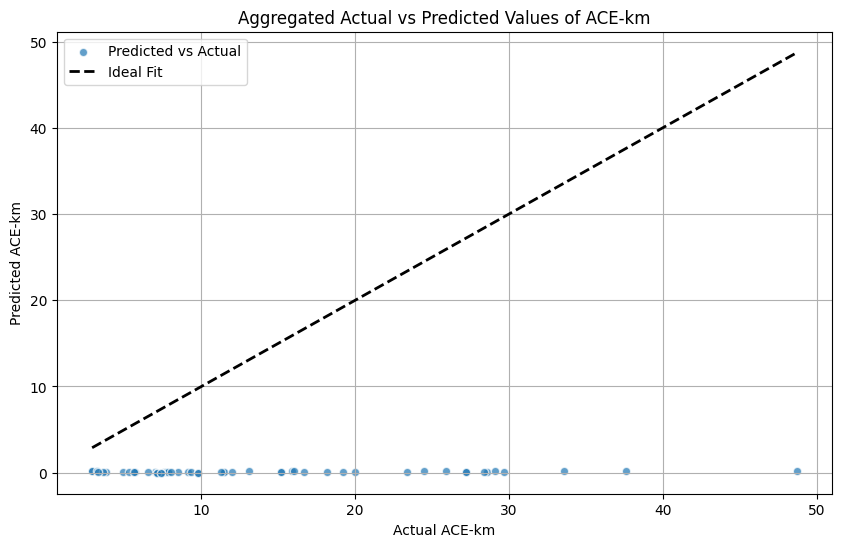


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 292.9445
R-squared: -1.8369
Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2697.4448 - mae: 41.2333
Epoch 1: val_loss improved from inf to 684.37305, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 3s 3s/step - loss: 2697.4448 - mae: 41.2333 - val_loss: 684.3730 - val_mae: 26.1222 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2689.7148 - mae: 41.2315
Epoch 2: val_loss improved from 684.37305 to 684.33813, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 145ms/step - loss: 2689.7148 - mae: 41.2315 - val_loss: 684.3381 - val_mae: 26.1215 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2682.9993 - mae: 41.2296
Epoch 3: val_loss improved from 684.33813 to 684.30591, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [========================

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2255.0508 - mae: 37.3647
Epoch 1: val_loss improved from inf to 8453.88672, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2255.0508 - mae: 37.3647 - val_loss: 8453.8867 - val_mae: 91.8956 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2248.9580 - mae: 37.3627
Epoch 2: val_loss improved from 8453.88672 to 8453.63867, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 142ms/step - loss: 2248.9580 - mae: 37.3627 - val_loss: 8453.6387 - val_mae: 91.8943 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2243.4766 - mae: 37.3607
Epoch 3: val_loss improved from 8453.63867 to 8453.40137, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 140ms/step - loss: 2243.4766 - mae: 37.3607 - val_loss: 8453.4014 - val_ma

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2536.1177 - mae: 39.4942
Epoch 1: val_loss improved from inf to 4073.47168, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2536.1177 - mae: 39.4942 - val_loss: 4073.4717 - val_mae: 63.7991 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2529.9475 - mae: 39.4921
Epoch 2: val_loss improved from 4073.47168 to 4073.11230, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 149ms/step - loss: 2529.9475 - mae: 39.4921 - val_loss: 4073.1123 - val_mae: 63.7963 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2524.1401 - mae: 39.4899
Epoch 3: val_loss improved from 4073.11230 to 4072.77832, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 141ms/step - loss: 2524.1401 - mae: 39.4899 - val_loss: 4072.7783 - val_ma

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2684.6582 - mae: 40.8667
Epoch 1: val_loss improved from inf to 1049.50708, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2684.6582 - mae: 40.8667 - val_loss: 1049.5071 - val_mae: 32.3656 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2673.9456 - mae: 40.8646
Epoch 2: val_loss improved from 1049.50708 to 1049.29419, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 144ms/step - loss: 2673.9456 - mae: 40.8646 - val_loss: 1049.2942 - val_mae: 32.3623 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2665.0515 - mae: 40.8625
Epoch 3: val_loss improved from 1049.29419 to 1049.09192, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 153ms/step - loss: 2665.0515 - mae: 40.8625 - val_loss: 1049.0919 - val_ma

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2530.9661 - mae: 39.2941
Epoch 1: val_loss improved from inf to 3518.29419, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2530.9661 - mae: 39.2941 - val_loss: 3518.2942 - val_mae: 59.0980 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2523.0728 - mae: 39.2920
Epoch 2: val_loss improved from 3518.29419 to 3518.03125, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 154ms/step - loss: 2523.0728 - mae: 39.2920 - val_loss: 3518.0312 - val_mae: 59.0958 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2516.8032 - mae: 39.2899
Epoch 3: val_loss improved from 3518.03125 to 3517.77026, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 147ms/step - loss: 2516.8032 - mae: 39.2899 - val_loss: 3517.7703 - val_ma

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2505.8491 - mae: 39.1451
Epoch 1: val_loss improved from inf to 3983.09058, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2505.8491 - mae: 39.1451 - val_loss: 3983.0906 - val_mae: 61.6298 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2497.9875 - mae: 39.1430
Epoch 2: val_loss improved from 3983.09058 to 3982.95972, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 159ms/step - loss: 2497.9875 - mae: 39.1430 - val_loss: 3982.9597 - val_mae: 61.6288 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2490.4646 - mae: 39.1409
Epoch 3: val_loss improved from 3982.95972 to 3982.83032, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 151ms/step - loss: 2490.4646 - mae: 39.1409 - val_loss: 3982.8303 - val_ma

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 1974.7332 - mae: 36.1137
Epoch 1: val_loss improved from inf to 13045.52344, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 1974.7332 - mae: 36.1137 - val_loss: 13045.5234 - val_mae: 113.1587 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 1968.1703 - mae: 36.1117
Epoch 2: val_loss improved from 13045.52344 to 13044.82715, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 175ms/step - loss: 1968.1703 - mae: 36.1117 - val_loss: 13044.8271 - val_mae: 113.1556 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 1962.8877 - mae: 36.1096
Epoch 3: val_loss improved from 13044.82715 to 13044.14355, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 151ms/step - loss: 1962.8877 - mae: 36.1096 - val_loss: 13044.143

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2725.6826 - mae: 40.9843
Epoch 1: val_loss improved from inf to 936.49097, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2725.6826 - mae: 40.9843 - val_loss: 936.4910 - val_mae: 30.3692 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2718.6313 - mae: 40.9822
Epoch 2: val_loss improved from 936.49097 to 936.30927, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 150ms/step - loss: 2718.6313 - mae: 40.9822 - val_loss: 936.3093 - val_mae: 30.3663 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2711.2849 - mae: 40.9801
Epoch 3: val_loss improved from 936.30927 to 936.13007, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 162ms/step - loss: 2711.2849 - mae: 40.9801 - val_loss: 936.1301 - val_mae: 30.36

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2585.2795 - mae: 40.3712
Epoch 1: val_loss improved from inf to 1683.37097, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2585.2795 - mae: 40.3712 - val_loss: 1683.3710 - val_mae: 40.9983 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2577.1667 - mae: 40.3691
Epoch 2: val_loss improved from 1683.37097 to 1683.23022, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 154ms/step - loss: 2577.1667 - mae: 40.3691 - val_loss: 1683.2302 - val_mae: 40.9966 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2569.6082 - mae: 40.3670
Epoch 3: val_loss improved from 1683.23022 to 1683.09277, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 154ms/step - loss: 2569.6082 - mae: 40.3670 - val_loss: 1683.0928 - val_ma

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2729.3582 - mae: 42.4137
Epoch 1: val_loss improved from inf to 37.85938, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 4s 4s/step - loss: 2729.3582 - mae: 42.4137 - val_loss: 37.8594 - val_mae: 6.0629 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2721.4854 - mae: 42.4117
Epoch 2: val_loss improved from 37.85938 to 37.84813, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 142ms/step - loss: 2721.4854 - mae: 42.4117 - val_loss: 37.8481 - val_mae: 6.0620 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2715.5356 - mae: 42.4097
Epoch 3: val_loss improved from 37.84813 to 37.83830, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 153ms/step - loss: 2715.5356 - mae: 42.4097 - val_loss: 37.8383 - val_mae: 6.0612 - lr: 1.

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2747.6675 - mae: 41.7500
Epoch 1: val_loss improved from inf to 26.91607, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2747.6675 - mae: 41.7500 - val_loss: 26.9161 - val_mae: 5.1511 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2742.0063 - mae: 41.7479
Epoch 2: val_loss improved from 26.91607 to 26.89615, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 141ms/step - loss: 2742.0063 - mae: 41.7479 - val_loss: 26.8962 - val_mae: 5.1492 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2736.3047 - mae: 41.7459
Epoch 3: val_loss improved from 26.89615 to 26.87583, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 154ms/step - loss: 2736.3047 - mae: 41.7459 - val_loss: 26.8758 - val_mae: 5.1473 - lr: 1.

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2763.3772 - mae: 41.8706
Epoch 1: val_loss improved from inf to 235.17183, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2763.3772 - mae: 41.8706 - val_loss: 235.1718 - val_mae: 15.2998 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2755.0386 - mae: 41.8685
Epoch 2: val_loss improved from 235.17183 to 235.13042, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 148ms/step - loss: 2755.0386 - mae: 41.8685 - val_loss: 235.1304 - val_mae: 15.2985 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2748.6318 - mae: 41.8665
Epoch 3: val_loss improved from 235.13042 to 235.09344, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 145ms/step - loss: 2748.6318 - mae: 41.8665 - val_loss: 235.0934 - val_mae: 15.29

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2611.0867 - mae: 40.1294
Epoch 1: val_loss improved from inf to 2045.33435, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2611.0867 - mae: 40.1294 - val_loss: 2045.3344 - val_mae: 44.8960 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2601.6038 - mae: 40.1273
Epoch 2: val_loss improved from 2045.33435 to 2045.07227, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 158ms/step - loss: 2601.6038 - mae: 40.1273 - val_loss: 2045.0723 - val_mae: 44.8931 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2594.1755 - mae: 40.1253
Epoch 3: val_loss improved from 2045.07227 to 2044.82031, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 149ms/step - loss: 2594.1755 - mae: 40.1253 - val_loss: 2044.8203 - val_ma

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2718.2351 - mae: 42.0020
Epoch 1: val_loss improved from inf to 171.17076, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2718.2351 - mae: 42.0020 - val_loss: 171.1708 - val_mae: 13.0621 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2708.2463 - mae: 41.9999
Epoch 2: val_loss improved from 171.17076 to 171.11560, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 160ms/step - loss: 2708.2463 - mae: 41.9999 - val_loss: 171.1156 - val_mae: 13.0600 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2702.4268 - mae: 41.9979
Epoch 3: val_loss improved from 171.11560 to 171.06456, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 156ms/step - loss: 2702.4268 - mae: 41.9979 - val_loss: 171.0646 - val_mae: 13.05

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2739.3267 - mae: 40.5608
Epoch 1: val_loss improved from inf to 1411.62903, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2739.3267 - mae: 40.5608 - val_loss: 1411.6290 - val_mae: 37.5680 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2727.6790 - mae: 40.5588
Epoch 2: val_loss improved from 1411.62903 to 1411.50134, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 165ms/step - loss: 2727.6790 - mae: 40.5588 - val_loss: 1411.5013 - val_mae: 37.5663 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2716.8040 - mae: 40.5567
Epoch 3: val_loss improved from 1411.50134 to 1411.37878, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 160ms/step - loss: 2716.8040 - mae: 40.5567 - val_loss: 1411.3788 - val_ma

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2714.7024 - mae: 42.3137
Epoch 1: val_loss improved from inf to 61.09294, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2714.7024 - mae: 42.3137 - val_loss: 61.0929 - val_mae: 7.7625 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2710.9587 - mae: 42.3117
Epoch 2: val_loss improved from 61.09294 to 61.06899, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 159ms/step - loss: 2710.9587 - mae: 42.3117 - val_loss: 61.0690 - val_mae: 7.7610 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2707.3748 - mae: 42.3096
Epoch 3: val_loss improved from 61.06899 to 61.04543, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 155ms/step - loss: 2707.3748 - mae: 42.3096 - val_loss: 61.0454 - val_mae: 7.7595 - lr: 1.

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2900.7571 - mae: 43.3688
Epoch 1: val_loss improved from inf to 281.28763, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2900.7571 - mae: 43.3688 - val_loss: 281.2876 - val_mae: 16.5995 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2893.7312 - mae: 43.3666
Epoch 2: val_loss improved from 281.28763 to 281.21783, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 294ms/step - loss: 2893.7312 - mae: 43.3666 - val_loss: 281.2178 - val_mae: 16.5974 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2887.6946 - mae: 43.3645
Epoch 3: val_loss improved from 281.21783 to 281.14822, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 205ms/step - loss: 2887.6946 - mae: 43.3645 - val_loss: 281.1482 - val_mae: 16.59

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 2358.9722 - mae: 37.9902
Epoch 1: val_loss improved from inf to 6619.55713, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 2s 2s/step - loss: 2358.9722 - mae: 37.9902 - val_loss: 6619.5571 - val_mae: 81.2678 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 2353.2788 - mae: 37.9882
Epoch 2: val_loss improved from 6619.55713 to 6619.11328, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 165ms/step - loss: 2353.2788 - mae: 37.9882 - val_loss: 6619.1133 - val_mae: 81.2651 - lr: 1.0000e-04
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 2348.8606 - mae: 37.9861
Epoch 3: val_loss improved from 6619.11328 to 6618.69385, saving model to ./VGG16_regression_task_weights.hdf5
1/1 [==============================] - 0s 152ms/step - loss: 2348.8606 - mae: 37.9861 - val_loss: 6618.6938 - val_ma

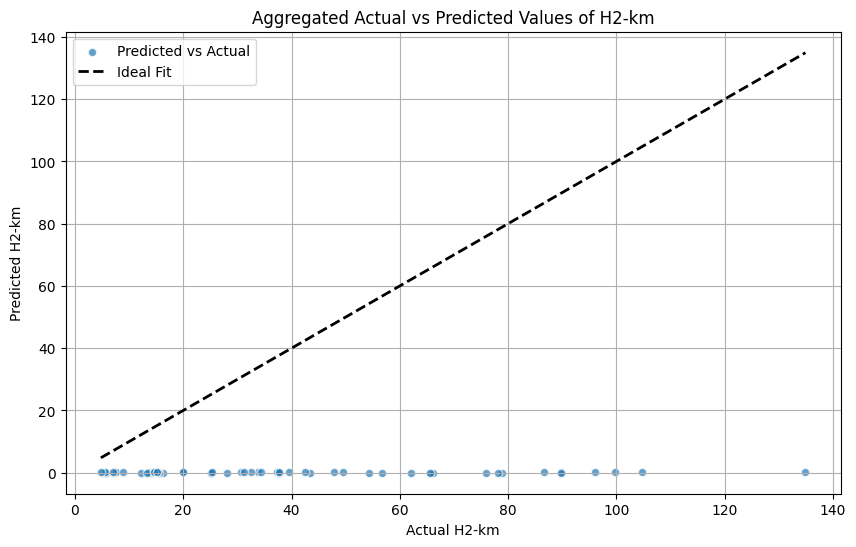


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 2584.1091
R-squared: -1.6886


In [7]:
import time
import sys
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, Callback
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout, GlobalAveragePooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.regularizers import l2  # Import L2 regularization
from tensorflow.keras.callbacks import ReduceLROnPlateau


# Set constants
WIDTH = 224  # Initial assumption; will be dynamically adjusted based on data shape
BATCH_SIZE = 128
NB_EPOCH = 50
LEARNING_RATE = 1e-04
PATIENCE = 4
BN = True
LOW_DIM = 1  # For regression
PB_FLAG = 'regression_task'
ROOTPATH = './'  # Set your directory path for logs and weights

# Custom Callback to check for NaNs
class CheckNan(Callback):
    def on_batch_end(self, batch, logs={}):
        if math.isnan(logs.get('loss')):
            print("\nReached a NaN loss, terminating training.")
            sys.exit()

# Define the L2Model class for regression tasks
class L2Model:
    def __init__(self, input_shape):
        self.network = Sequential()
        
        # Initial Conv1D Layers with Batch Normalization and L2 regularization
        self.network.add(Conv1D(filters=256, kernel_size=1, activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.001)))
        self.network.add(BatchNormalization())
        self.network.add(Conv1D(filters=256, kernel_size=1, activation='relu', kernel_regularizer=l2(0.001)))
        self.network.add(BatchNormalization())
        self.network.add(GlobalAveragePooling1D())
        
        if BN:
            self.network.add(BatchNormalization())
        self.network.add(Dense(LOW_DIM, activation='linear', kernel_regularizer=l2(0.001)))

        # Compile the model with a scheduler
        optimizer = Adam(learning_rate=LEARNING_RATE)
        self.network.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        
    def fit(self, X_train, y_train, X_val, y_val):
        # Define callbacks
        csv_logger = CSVLogger(ROOTPATH + "VGG16_" + PB_FLAG + '_training.log')
        checkpointer = ModelCheckpoint(filepath=ROOTPATH + "VGG16_" + PB_FLAG + "_weights.hdf5", 
                                       monitor='val_loss', verbose=1, save_weights_only=True, 
                                       save_best_only=True, mode='min')
        early_stopping = EarlyStopping(monitor='val_loss', patience=2)  # Reduced patience
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

        # Train the model
        self.network.fit(X_train, y_train, epochs=NB_EPOCH, batch_size=BATCH_SIZE, 
                         validation_data=(X_val, y_val), callbacks=[checkpointer, csv_logger, 
                                                                    early_stopping, lr_scheduler, CheckNan()])

    def predict(self, X_test):
        return self.network.predict(X_test).flatten()

# Main Setup for Loading Data and Running Cross-Validation
# Load and preprocess your data here
target_columns = ['ACE-km', 'H2-km']
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]  # Remove rows with 'x'
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Apply MinMax normalization only to non-target columns
non_target_columns = df_cleaned.columns.difference(target_columns)
scaler = MinMaxScaler()
df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])

# Convert to float32 for compatibility
df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

# Run the model for each target column
for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    # Reshape X for compatibility with Conv1D
    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    # Set input shape dynamically
    input_shape = (X.shape[1], 1)
    
    y_tests = []
    y_preds = []

    # Leave-One-Group-Out Cross-Validation
    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Initialize and train the model
        l2_model = L2Model(input_shape=input_shape)
        l2_model.fit(X_train, y_train, X_test, y_test)

        # Predict and store results
        y_pred = l2_model.predict(X_test)
        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Calculate and display overall metrics
    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


## SVR

Fitting 18 folds for each of 18 candidates, totalling 324 fits


/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_76050/4173586806.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])



Best parameters for ACE-km: {'C': 1, 'epsilon': 0.2, 'kernel': 'linear'}
Best CV Score (MSE): 67.3234


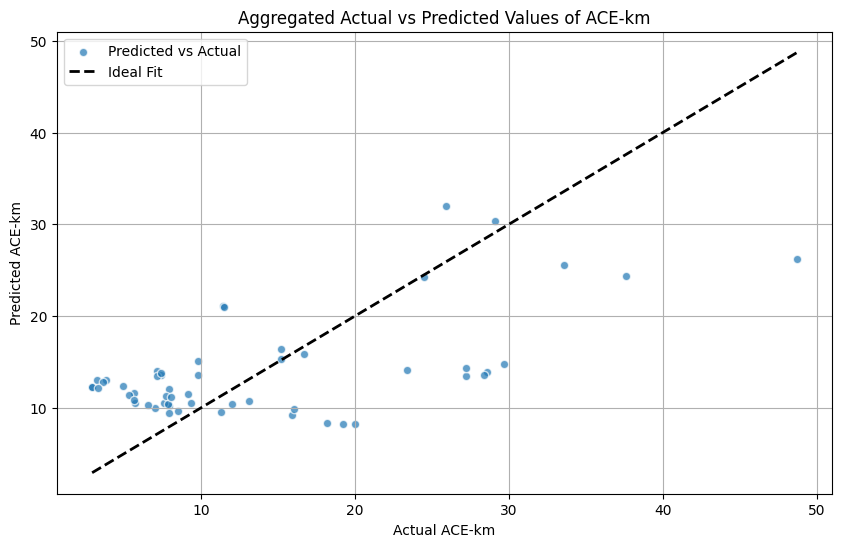


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 65.2898
R-squared: 0.3677
Fitting 18 folds for each of 18 candidates, totalling 324 fits

Best parameters for H2-km: {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}
Best CV Score (MSE): 590.4131


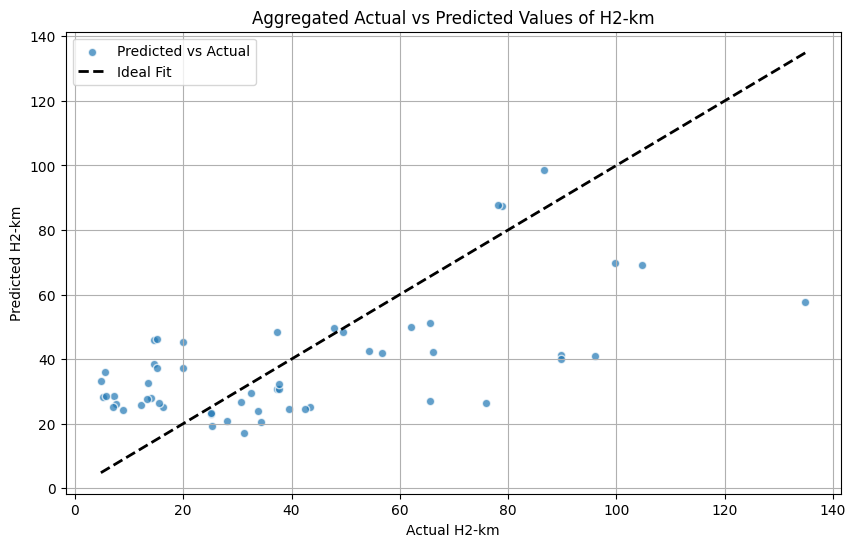


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 602.2282
R-squared: 0.3734


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

# List of target columns
target_columns = ['ACE-km', 'H2-km']

# Remove rows with 'x' values
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

# Ensure column names are strings
df_cleaned.columns = df_cleaned.columns.astype(str)

# Identify columns that start with 'Digester'
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

# Define groups based on the Digester columns
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Apply MinMax normalization only to non-target columns
non_target_columns = df_cleaned.columns.difference(target_columns)
scaler = MinMaxScaler()
df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])

# Ensure the data type is float32
df_cleaned = df_cleaned.astype(np.float32)

# Define the parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf']
}

# Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Train and evaluate model for each target column
for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    X = X.astype(np.float32)
    
    y_tests = []
    y_preds = []

    # Initialize SVR model
    svr = SVR()

    # Set up GridSearchCV with LeaveOneGroupOut cross-validation
    grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=logo.split(X, y, groups),
                               scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

    # Fit grid search
    grid_search.fit(X, y)

    # Best parameters and score
    print(f"\nBest parameters for {target_column}: {grid_search.best_params_}")
    print(f"Best CV Score (MSE): {abs(grid_search.best_score_):.4f}")

    # Get predictions with the best model
    best_model = grid_search.best_estimator_
    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)

        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    # Calculate metrics
    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print overall cross-validation metrics
    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")



=== Results for target: ACE-km ===

Training XGBoost...


/var/folders/0k/33xc23rd39v28fxtr5xb2gbh0000gn/T/ipykernel_76050/762266296.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])


Best parameters for XGBoost: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}

XGBoost - Mean Squared Error: 82.5051
XGBoost - R-squared: 0.2010


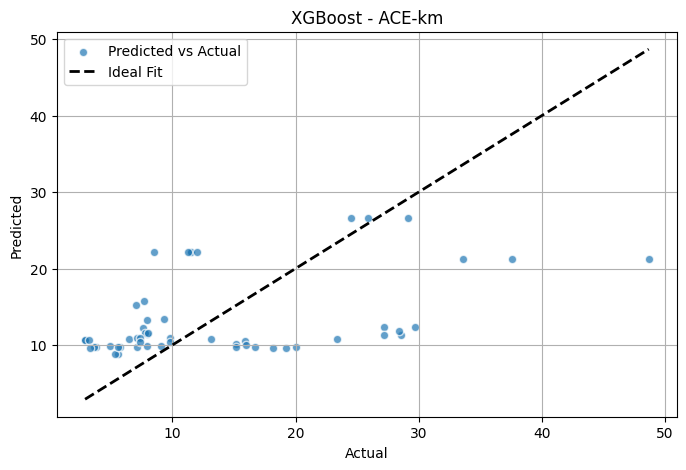


Training LightGBM...


/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 2] No such file or directory: 'sysctl'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 2] No such file or directory: 'sysctl'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reaso

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1734
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Number of data points in the train set: 43, number of used features: 144
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 43, number of used features: 141
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1866
[LightGBM] [Info] Start training from score 11.351163[LightGBM] [Info] Number of data points in the train set: 43, number of used features: 153

[LightGBM] [Info] Start training from score 15.741861
[LightGBM] [Info] Start trainin

  File "/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/joblib/externals/loky/backend/context.py", line 270, in _count_physical_cores
    cpu_info = subprocess.run(
  File "/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/subprocess.py", line 1847, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2581
[LightGBM] [Info] Number of data points in the train set: 54, number of used features: 188
[LightGBM] [Info] Start training from score 13.892593
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

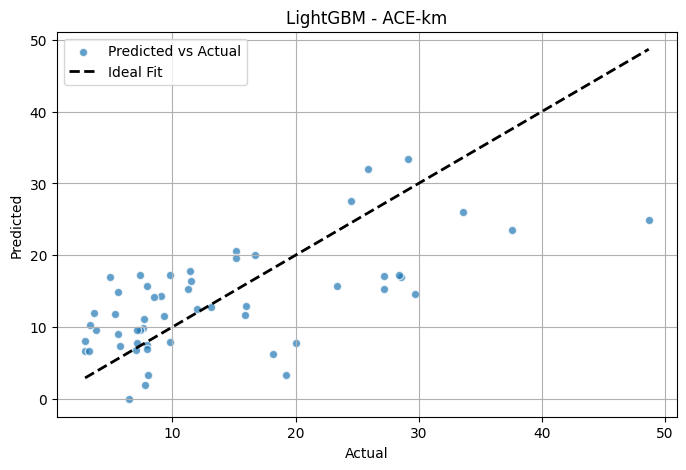


Training CatBoost...
Best parameters for CatBoost: {'learning_rate': 0.1, 'iterations': 100, 'depth': 5}

CatBoost - Mean Squared Error: 64.4589
CatBoost - R-squared: 0.3758


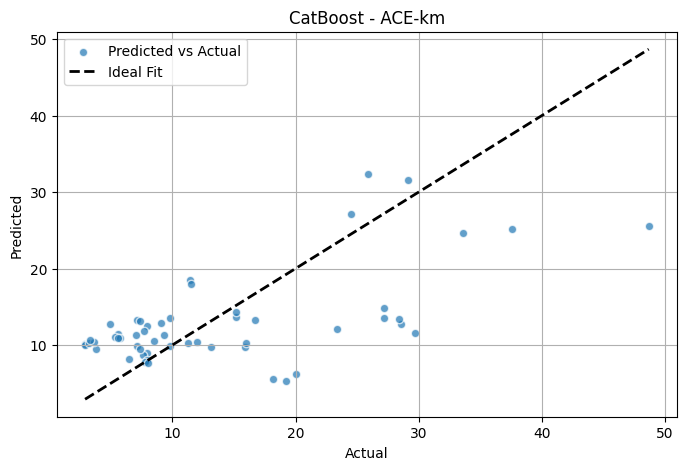


Training RandomForest...
Best parameters for RandomForest: {'n_estimators': 100, 'max_depth': None}

RandomForest - Mean Squared Error: 62.3594
RandomForest - R-squared: 0.3961


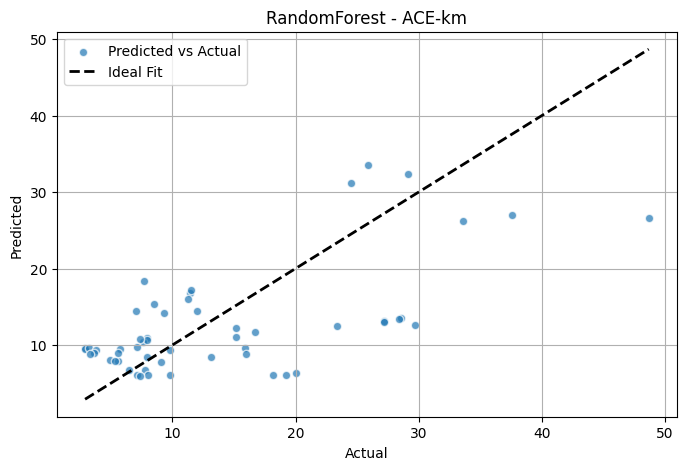


Training ElasticNet...


/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.294e-01, tolerance: 4.767e-01
  model = cd_fast.enet_coordinate_descent(
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.242e-01, tolerance: 4.614e-01
  model = cd_fast.enet_coordinate_descent(
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Best parameters for ElasticNet: {'l1_ratio': 0.2, 'alpha': 1.0}

ElasticNet - Mean Squared Error: 76.2840
ElasticNet - R-squared: 0.2612


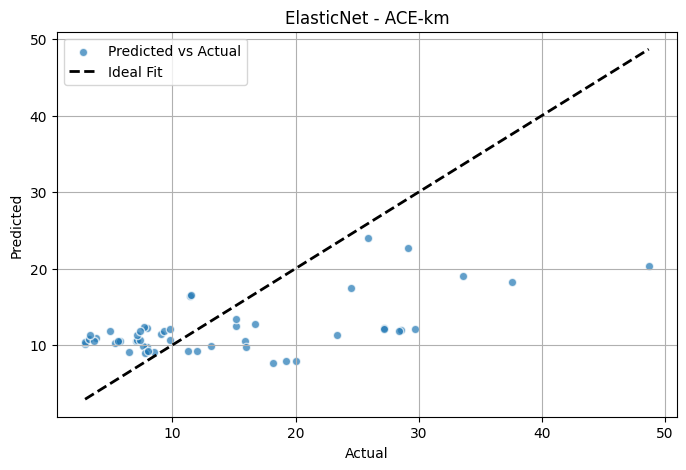


Training kNN...
Best parameters for kNN: {'n_neighbors': 5}

kNN - Mean Squared Error: 88.5501
kNN - R-squared: 0.1425


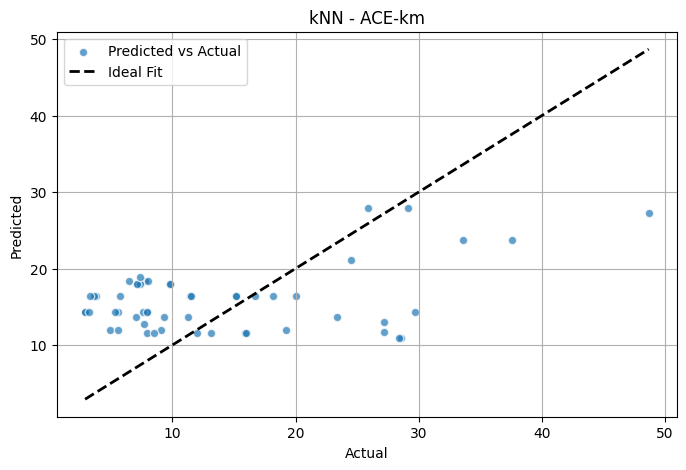


Training Neural Network for ACE-km...
1/1 [==============================] - 0s 39ms/step

Neural Network - Mean Squared Error: 24701.5723
Neural Network - R-squared: -238.2156


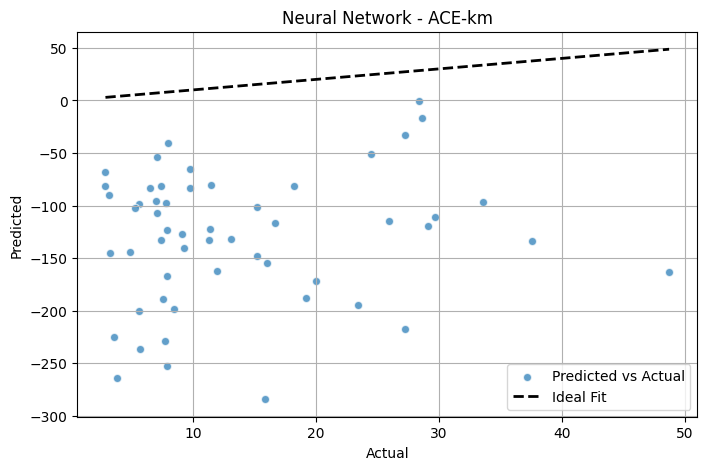


=== Results for target: H2-km ===

Training XGBoost...
Best parameters for XGBoost: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

XGBoost - Mean Squared Error: 862.0016
XGBoost - R-squared: 0.1031


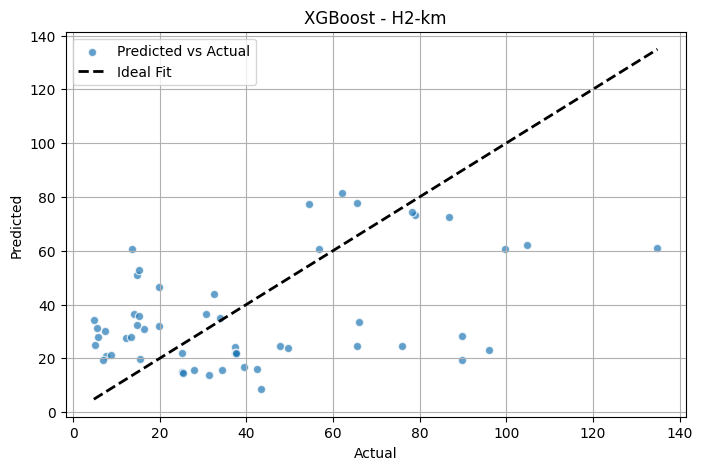


Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1866
[LightGBM] [Info] Number of data points in the train set: 43, number of used features: 153
[LightGBM] [Info] Start training from score 39.953488
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1734
[LightGBM] [Info] Number of data points in the train set: 43, number of used features: 144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Start training from score 42.437209
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

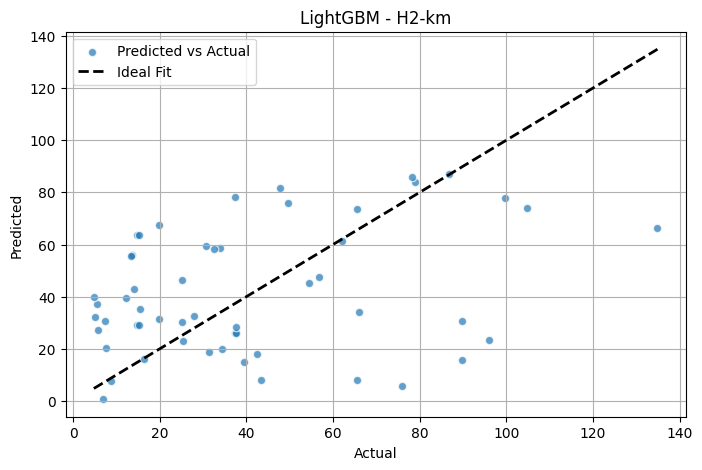


Training CatBoost...
Best parameters for CatBoost: {'learning_rate': 0.1, 'iterations': 200, 'depth': 5}

CatBoost - Mean Squared Error: 599.9664
CatBoost - R-squared: 0.3758


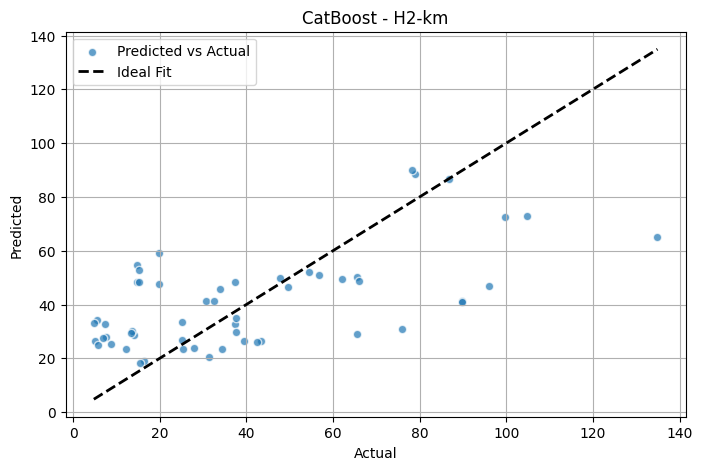


Training RandomForest...
Best parameters for RandomForest: {'n_estimators': 200, 'max_depth': None}

RandomForest - Mean Squared Error: 769.5171
RandomForest - R-squared: 0.1994


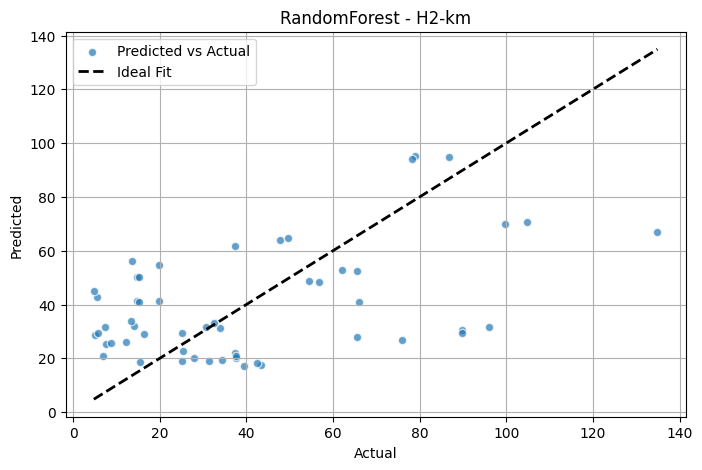


Training ElasticNet...


/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.562e+01, tolerance: 4.691e+00
  model = cd_fast.enet_coordinate_descent(
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.336e+01, tolerance: 2.921e+00
  model = cd_fast.enet_coordinate_descent(
/Users/sb/miniforge3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Best parameters for ElasticNet: {'l1_ratio': 0.2, 'alpha': 1.0}

ElasticNet - Mean Squared Error: 666.2129
ElasticNet - R-squared: 0.3068


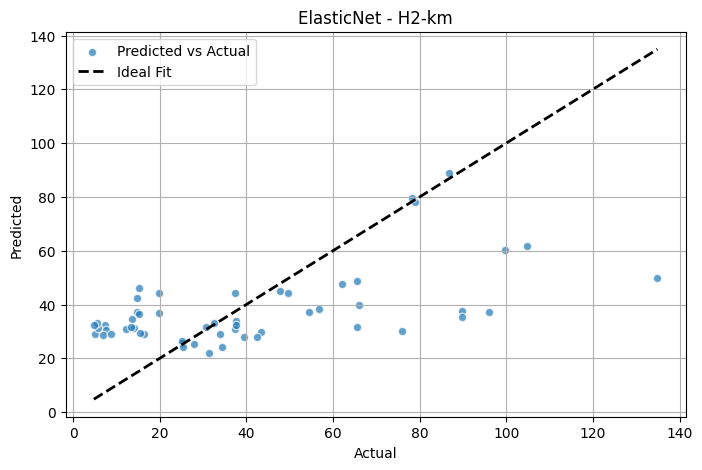


Training kNN...
Best parameters for kNN: {'n_neighbors': 5}

kNN - Mean Squared Error: 813.4293
kNN - R-squared: 0.1537


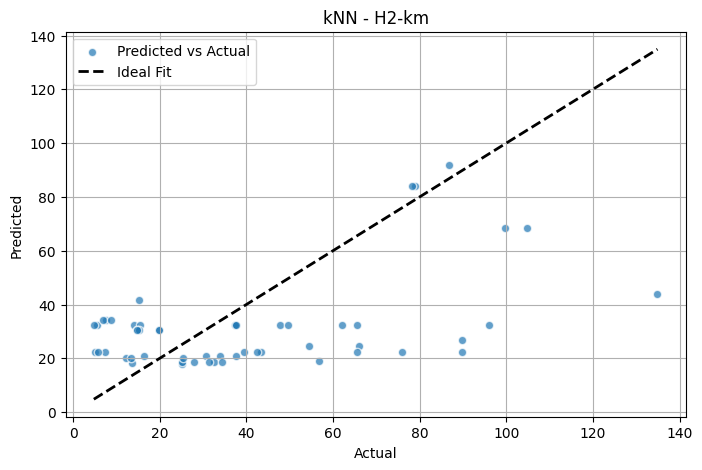


Training Neural Network for H2-km...
1/1 [==============================] - 0s 39ms/step

Neural Network - Mean Squared Error: 97855.1562
Neural Network - R-squared: -100.8136


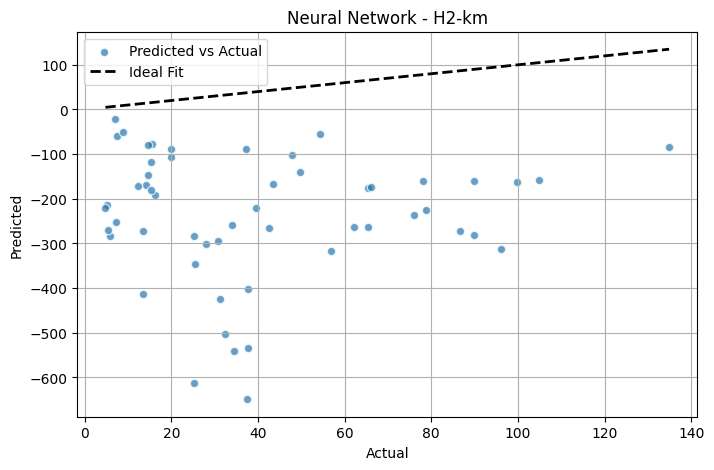

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a function to create the neural network model
def build_nn_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Target columns
target_columns = ['ACE-km', 'H2-km']

# Clean and preprocess the dataset (assuming df_use is your dataframe)
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]
df_cleaned.columns = df_cleaned.columns.astype(str)
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]
groups = df_cleaned[digester_columns].idxmax(axis=1)
non_target_columns = df_cleaned.columns.difference(target_columns)
scaler = StandardScaler()
df_cleaned[non_target_columns] = scaler.fit_transform(df_cleaned[non_target_columns])
df_cleaned = df_cleaned.astype(np.float32)

# Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Define parameter grids for each model
param_grids = {
    'xgb': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    'lgbm': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    'catboost': {'iterations': [100, 200], 'learning_rate': [0.01, 0.1], 'depth': [3, 5]},
    'rf': {'n_estimators': [100, 200], 'max_depth': [None, 10]},
    'elasticnet': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]},
    'knn': {'n_neighbors': [3, 5, 7]}
}

# Initialize models
models = {
    'XGBoost': RandomizedSearchCV(XGBRegressor(), param_distributions=param_grids['xgb'], n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1),
    'LightGBM': RandomizedSearchCV(LGBMRegressor(), param_distributions=param_grids['lgbm'], n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1),
    'CatBoost': RandomizedSearchCV(CatBoostRegressor(verbose=0), param_distributions=param_grids['catboost'], n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1),
    'RandomForest': RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grids['rf'], n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1),
    'ElasticNet': RandomizedSearchCV(ElasticNet(), param_distributions=param_grids['elasticnet'], n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1),
    'kNN': RandomizedSearchCV(KNeighborsRegressor(), param_distributions=param_grids['knn'], n_iter=5, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
}

# Train and evaluate model for each target column
for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values
    X = X.astype(np.float32)
    
    print(f"\n=== Results for target: {target_column} ===")
    
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        
        y_tests, y_preds = [], []
        
        # Fit RandomizedSearchCV for non-NN models
        model.fit(X, y)
        best_model = model.best_estimator_
        print(f"Best parameters for {model_name}: {model.best_params_}")
        
        # Get predictions with the best model for each fold
        for train_index, test_index in logo.split(X, y, groups):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
            y_tests.extend(y_test)
            y_preds.extend(y_pred)
                
        # Calculate and display metrics
        mse = mean_squared_error(y_tests, y_preds)
        r2 = r2_score(y_tests, y_preds)
        
        print(f"\n{model_name} - Mean Squared Error: {mse:.4f}")
        print(f"{model_name} - R-squared: {r2:.4f}")
        
        # Plot results
        plt.figure(figsize=(8, 5))
        plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
        plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'{model_name} - {target_column}')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Neural Network
    print(f"\nTraining Neural Network for {target_column}...")
    y_tests_nn, y_preds_nn = [], []
    
    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        nn_model = build_nn_model(input_shape=X_train.shape[1])
        nn_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
        y_pred_nn = nn_model.predict(X_test).flatten()
        
        y_tests_nn.extend(y_test)
        y_preds_nn.extend(y_pred_nn)
        
    # Calculate and display metrics for Neural Network
    mse_nn = mean_squared_error(y_tests_nn, y_preds_nn)
    r2_nn = r2_score(y_tests_nn, y_preds_nn)
    
    print(f"\nNeural Network - Mean Squared Error: {mse_nn:.4f}")
    print(f"Neural Network - R-squared: {r2_nn:.4f}")
    
    # Plot results for Neural Network
    plt.figure(figsize=(8, 5))
    plt.scatter(y_tests_nn, y_preds_nn, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests_nn), max(y_tests_nn)], [min(y_tests_nn), max(y_tests_nn)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Neural Network - {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [17]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.1/27.1 MB 24.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 25.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


------

## Other

1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 12s 12s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


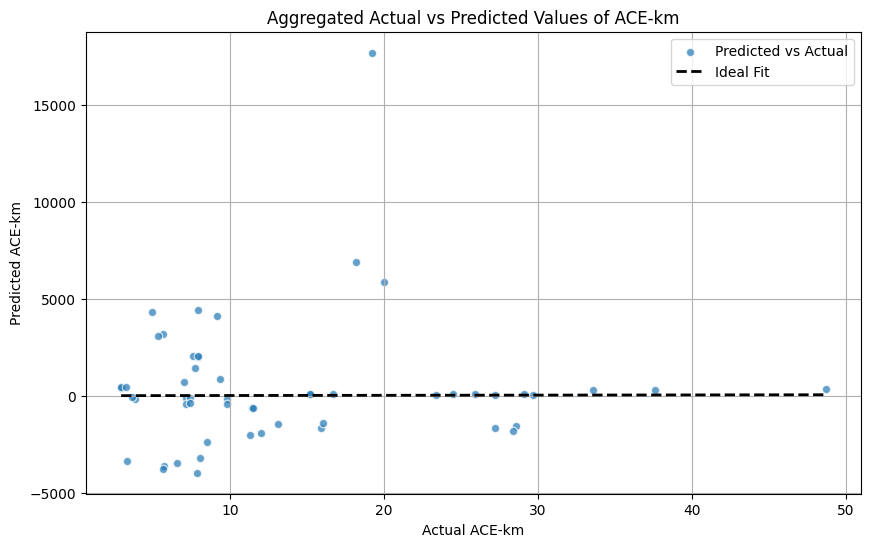


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 10982603.0000
R-squared: -106357.0111


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 6s 6s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 5s 5s/step


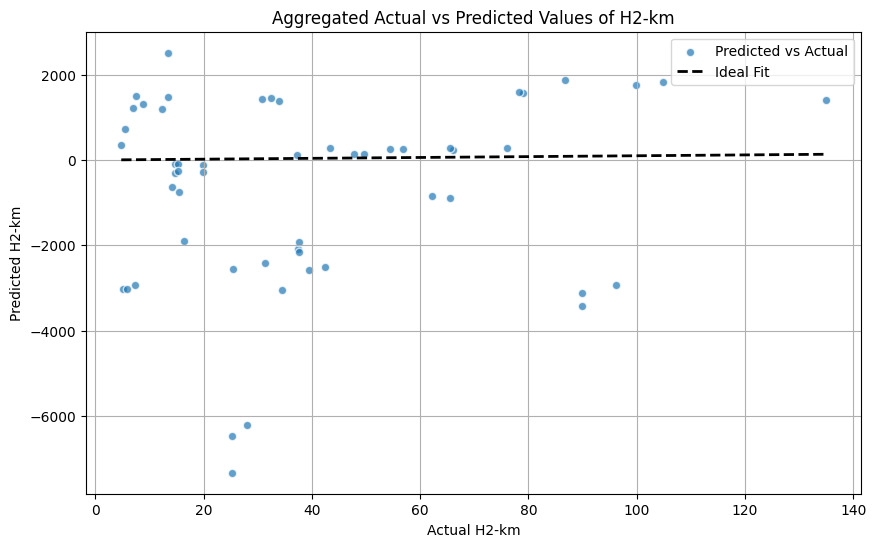


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 5306016.5000
R-squared: -5519.6599


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

target_columns = ['ACE-km', 'H2-km']

df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

groups = df_cleaned[digester_columns].idxmax(axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)

df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

        model = build_model((X_train.shape[1], 1))

        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        y_pred = model.predict(X_test).flatten()

        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


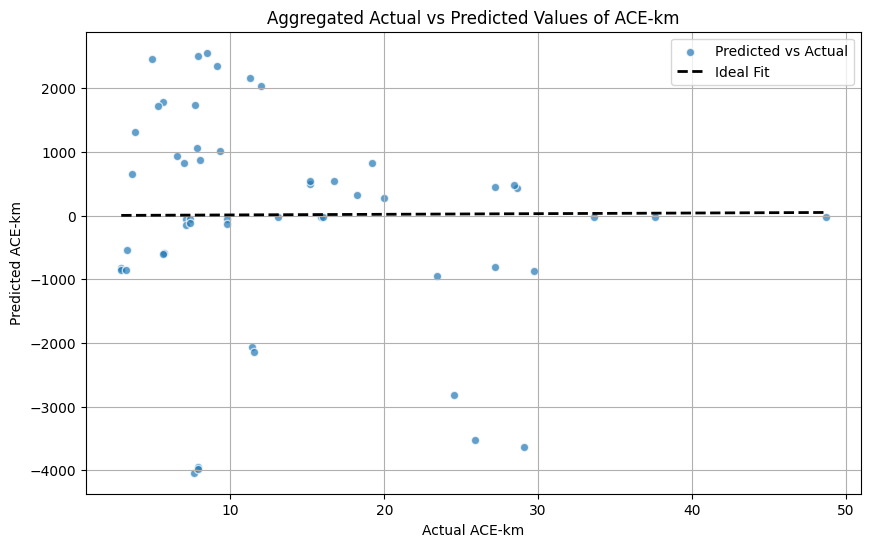


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 2727297.7500
R-squared: -26410.7723


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 4s 4s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 7s 7s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


1/1 [==============================] - 3s 3s/step


KeyboardInterrupt: 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

# Your target columns
target_columns = ['ACE-km', 'H2-km']

# Clean the DataFrame by removing rows with 'x' and create a copy to avoid SettingWithCopyWarning
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)].copy()

# Identify digester columns
digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

# Define groups for Leave-One-Group-Out cross-validation
groups = df_cleaned[digester_columns].idxmax(axis=1)

# Remove only target columns from features
feature_columns = df_cleaned.columns.difference(target_columns)

# Standardize the features (excluding target columns)
# scaler = StandardScaler()
# df_cleaned.loc[:, feature_columns] = scaler.fit_transform(df_cleaned[feature_columns])

# Convert DataFrame to float32
df_cleaned = df_cleaned.astype(np.float32)

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# Loop over each target column
for target_column in target_columns:
    # Prepare features and target
    X = df_cleaned[feature_columns].values  # Includes digester columns
    y = df_cleaned[target_column].values    # Target variable (not scaled)
    
    # Reshape X for Conv1D input: (samples, timesteps, features)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    
    y_tests = []
    y_preds = []
    
    # Perform Leave-One-Group-Out cross-validation
    for train_index, test_index in logo.split(X, y, groups):
        # Split the data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Build and train the model
        model = build_model((X_train.shape[1], 1))
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
        
        # Make predictions
        y_pred = model.predict(X_test).flatten()
        y_tests.extend(y_test)
        y_preds.extend(y_pred)
    
    # Calculate overall metrics
    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel(f'Actual {target_column}')
    plt.ylabel(f'Predicted {target_column}')
    plt.title(f'Aggregated Actual vs Predicted Values of {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print metrics
    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


2024-10-25 21:43:29.696098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:44:21.393480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 21:44:27.374591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:45:19.734341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step


2024-10-25 21:45:24.523396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:46:06.662022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 21:46:15.876774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:47:04.868031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 21:47:10.923927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:48:04.808431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-25 21:48:11.167038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:49:07.109796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-25 21:49:14.189229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:50:04.998497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 21:50:11.126063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:51:05.283248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-25 21:51:12.068381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:52:02.771373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 21:52:11.921173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:53:02.143170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-25 21:53:08.500246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:53:49.939789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 21:53:56.158268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:54:45.672500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 21:54:51.322709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:55:49.593622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 21:55:55.270931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:56:38.461914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 21:56:44.124895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:57:31.027031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 21:57:36.766332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:58:27.230200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 21:58:36.025268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:59:04.408016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step


2024-10-25 21:59:09.616562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 21:59:56.817786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


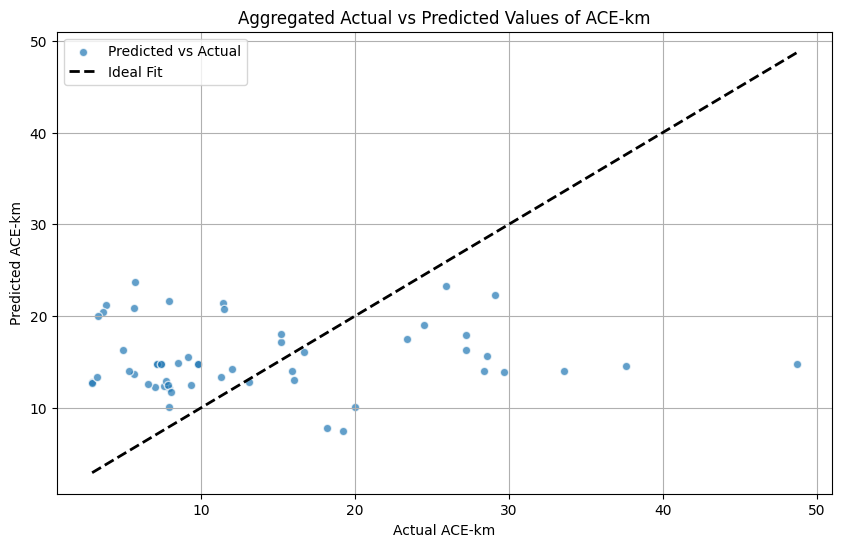


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 116.6112
R-squared: -0.1293


2024-10-25 22:00:02.701022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:00:50.792883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 22:00:56.820436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:01:45.822449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 22:01:51.893920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:02:39.344161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 22:02:45.465736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:03:36.247062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 22:03:42.248872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:04:33.995559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 22:04:48.148602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:05:37.857543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-25 22:05:44.127860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:06:31.330922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 22:06:37.395343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:07:25.241491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 22:07:31.027214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:08:19.152558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 22:08:25.021795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:09:17.888075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-25 22:09:24.309417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:10:15.613806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 22:10:25.140525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:11:18.384247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 22:11:24.508883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:12:15.480725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 22:12:21.665657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:13:14.879653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-25 22:13:21.400541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:14:10.651397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-25 22:14:17.072078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:15:06.081378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-25 22:15:11.933383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:15:41.861224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-25 22:15:48.257577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-25 22:16:41.993984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 9s 9s/step


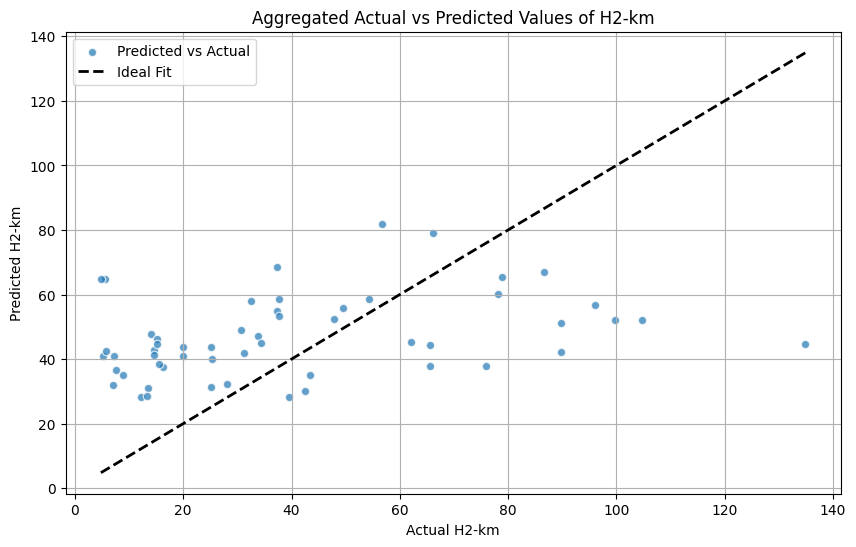


Overall Cross-Validation Metrics for H2-km:
Mean Squared Error: 885.1613
R-squared: 0.0790


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

target_columns = ['ACE-km', 'H2-km']

df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

groups = df_cleaned[digester_columns].idxmax(axis=1)

features = df_cleaned.drop(columns=target_columns)
targets = df_cleaned[target_columns]

scaler = StandardScaler()
# df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)

features_scaled = scaler.fit_transform(features)

df_cleaned = pd.DataFrame(features_scaled, columns=features.columns)
df_cleaned[target_columns] = targets.reset_index(drop=True)

# df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

        model = build_model((X_train.shape[1], 1))

        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        y_pred = model.predict(X_test).flatten()

        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


2024-10-27 17:34:54.921062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:36:05.927728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-27 17:36:13.103128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:37:13.459217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 7s 7s/step


2024-10-27 17:37:21.354473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:38:27.458719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-27 17:38:34.078360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:39:28.967138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-27 17:39:35.724313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:40:28.776579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 7s 7s/step


2024-10-27 17:40:36.348453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:41:44.316180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-27 17:41:55.510621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:42:52.094782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-27 17:42:58.592957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:43:55.727019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 393ms/step


2024-10-27 17:43:57.002955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:44:56.507681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-27 17:45:04.034239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:46:02.858991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


2024-10-27 17:46:08.955035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:47:11.145782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-27 17:47:18.365327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:47:51.075862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 445ms/step


2024-10-27 17:47:52.291500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:48:54.462718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-27 17:49:01.373511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:50:07.434705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 13s 13s/step


2024-10-27 17:50:17.410611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:51:19.202902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 490ms/step


2024-10-27 17:51:20.484583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:52:08.220528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-27 17:52:15.435432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:52:46.116868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


2024-10-27 17:52:53.078735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:53:28.275450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 6s 6s/step


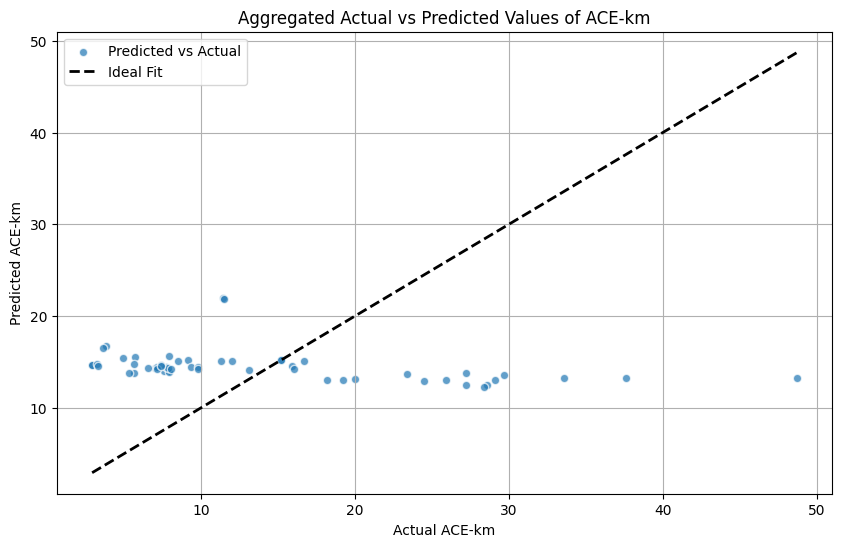


Overall Cross-Validation Metrics for ACE-km:
Mean Squared Error: 120.8898
R-squared: -0.1707


2024-10-27 17:53:35.587783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-27 17:54:23.474182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 630ms/step


2024-10-27 17:54:24.890955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

# Function to build the neural network model
def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Conv1D(filters=128, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Dropout(0.1),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Conv1D(filters=32, kernel_size=1, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

target_columns = ['ACE-km', 'H2-km']

df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

digester_columns = [col for col in df_cleaned.columns if col.startswith('Digester')]

groups = df_cleaned[digester_columns].idxmax(axis=1)

features = df_cleaned.drop(columns=target_columns)
targets = df_cleaned[target_columns]

# scaler = StandardScaler()
scaler = MinMaxScaler()
# df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned)

features_scaled = scaler.fit_transform(features)

df_cleaned = pd.DataFrame(features_scaled, columns=features.columns)
df_cleaned[target_columns] = targets.reset_index(drop=True)

# df_cleaned = df_cleaned.astype(np.float32)

logo = LeaveOneGroupOut()

for target_column in target_columns:
    X = df_cleaned.drop(columns=target_columns).values  
    y = df_cleaned[target_column].values

    X = X.reshape(X.shape[0], X.shape[1], 1).astype(np.float32)
    
    y_tests = []
    y_preds = []

    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        y_train = y_train.astype(np.float32)
        y_test = y_test.astype(np.float32)

        model = build_model((X_train.shape[1], 1))

        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        y_pred = model.predict(X_test).flatten()

        y_tests.extend(y_test)
        y_preds.extend(y_pred)

    mse_overall = mean_squared_error(y_tests, y_preds)
    r2_overall = r2_score(y_tests, y_preds)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_tests, y_preds, alpha=0.7, edgecolors='w', label='Predicted vs Actual')
    plt.plot([min(y_tests), max(y_tests)], [min(y_tests), max(y_tests)], 'k--', lw=2, label='Ideal Fit')
    plt.xlabel('Actual ' + target_column)
    plt.ylabel('Predicted ' + target_column)
    plt.title('Aggregated Actual vs Predicted Values of ' + target_column)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nOverall Cross-Validation Metrics for {target_column}:")
    print(f"Mean Squared Error: {mse_overall:.4f}")
    print(f"R-squared: {r2_overall:.4f}")


----------

In [29]:
print(df_cleaned[['ACE-km', 'H2-km']].head())  # Ensure these values match your expectations


   ACE-km      H2-km
0     2.9   7.300000
1     2.9   5.100000
2     3.2   5.800000
3    11.3  25.400000
4     8.5  34.400002


## Given Code

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score

# Your target columns
target_columns = ['ACE-km', 'H2-km']

# Assuming df_use is your initial DataFrame
df_cleaned = df_use[~df_use.isin(['x']).any(axis=1)]

# Identify digester columns
digester_columns = [col for col in df_cleaned.columns if col.startswith('digester')]

# Prepare the data
X = df_cleaned.drop(columns=target_columns)
y = df_cleaned[target_columns]  # Now includes multiple target variables

# **Do not remove digester columns from X**
# X = X.drop(columns=digester_columns)  # Commented out as digester columns are features

# Define and Compile Model
def build_model(input_shape, output_shape):
    # Define model
    model = keras.models.Sequential([
        keras.layers.Conv1D(filters=128, kernel_size=1, activation='relu', input_shape=input_shape),
        keras.layers.Conv1D(filters=128, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(filters=128, kernel_size=1, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Conv1D(filters=128, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(filters=128, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(filters=128, kernel_size=1, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(output_shape)
    ])

    # Compile Model
    model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001))
    
    return model

# Initialize variables
ann_predictions = pd.DataFrame(columns=target_columns)
history_cache = []

# Loop over each digester for leave-one-digester-out cross-validation
for fold, digester in enumerate(digester_columns):
    # Identify validation samples (samples belonging to the current digester)
    val_indices = df_cleaned[df_cleaned[digester] == 1].index
    X_val = X.loc[val_indices]
    y_val = y.loc[val_indices]
    
    # Identify training samples (samples not belonging to the current digester)
    train_indices = df_cleaned[df_cleaned[digester] != 1].index
    X_train = X.loc[train_indices]
    y_train = y.loc[train_indices].values  # Shape (num_samples, num_targets)
    
    # Reshape data for neural network
    X_train_nn = np.expand_dims(X_train.values, axis=2)
    X_val_nn = np.expand_dims(X_val.values, axis=2)
    
    # Build and train the model
    model = build_model((X_train.shape[1], 1), len(target_columns))
    history = model.fit(X_train_nn, y_train, batch_size=32, epochs=150, verbose=0, validation_data=(X_val_nn, y_val))
    
    # Predict on validation data
    predictions = model.predict(X_val_nn)  # Shape (num_samples, num_targets)
    pred_df = pd.DataFrame(predictions, index=val_indices, columns=target_columns)
    ann_predictions = ann_predictions.append(pred_df)
    history_cache.append(history)
    
    # Print status update
    print("--------[{}/{}]--------".format(fold+1, len(digester_columns)))
    for idx in val_indices:
        print("Validation Sample:", idx)
        for target in target_columns:
            print("ANN Prediction for {}: {:.5f}".format(target, pred_df.loc[idx, target]))
            print("Ground Truth for {}: {:.5f}\n".format(target, y.loc[idx, target]))
            
# Ensure ann_predictions are in the same order as y
ann_predictions = ann_predictions.loc[y.index]

# Compute R2 score for each target
print("\nCross Validation Results:\n")
for target in target_columns:
    ann_r2 = r2_score(y[target], ann_predictions[target])
    print("Neural Network R2 Score for {}: {:.5f}".format(target, ann_r2))


KeyError: "None of [Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 18, 19, 20, 21, 22, 23,\n       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,\n       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],\n      dtype='int64')] are in the [index]"

In [25]:
tf.config.run_functions_eagerly(True)
